# Exploration der Word2vec Embeddings 1

- ohne Bigramme
- vector_size: 300
- window: 3
- seed: 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statistics 

from collections import Counter
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from scipy import spatial
from sklearn.manifold import TSNE
from tabulate import tabulate

In [2]:
# trainierte Modelle laden

w2v1 = Word2Vec.load(os.path.join('../trained_models/Word2Vec1', '1w2v1.model'))
w2v2 = Word2Vec.load(os.path.join('../trained_models/Word2Vec1', '1w2v2.model'))
w2v3 = Word2Vec.load(os.path.join('../trained_models/Word2Vec1', '1w2v3.model'))
w2v4 = Word2Vec.load(os.path.join('../trained_models/Word2Vec1', '1w2v4.model'))
w2v5 = Word2Vec.load(os.path.join('../trained_models/Word2Vec1', '1w2v5.model'))
w2v6 = Word2Vec.load(os.path.join('../trained_models/Word2Vec1', '1w2v6.model'))
w2v7 = Word2Vec.load(os.path.join('../trained_models/Word2Vec1', '1w2v7.model'))
w2v8 = Word2Vec.load(os.path.join('../trained_models/Word2Vec1', '1w2v8.model'))
w2v9 = Word2Vec.load(os.path.join('../trained_models/Word2Vec1', '1w2v9.model'))
w2v10 = Word2Vec.load(os.path.join('../trained_models/Word2Vec1', '1w2v10.model'))
w2v11 = Word2Vec.load(os.path.join('../trained_models/Word2Vec1', '1w2v11.model'))
w2v12 = Word2Vec.load(os.path.join('../trained_models/Word2Vec1', '1w2v12.model'))
w2v13 = Word2Vec.load(os.path.join('../trained_models/Word2Vec1', '1w2v13.model'))

In [3]:
periods = ['1700-1750', '1751-1800', '1801-1825', '1826-1850', '1851-1875', '1876-1900', '1901-1925', 
          '1926-1950', '1951-1975', '1976-2000', '2001-2010', '2011-2016', '2017-2021']

In [4]:
models = [w2v1, w2v2, w2v3, w2v4, w2v5, w2v6, w2v7, w2v8, w2v9, w2v10, w2v11, w2v12, w2v13] 

In [5]:
# Hilfsfunktion zum Vergleich der most similar words eines Lemmas in den Zeitabschnitten

def compare_words(periods, models, word):
    msw = {}
    for p, m in zip(periods, models):
        if word in m.wv:
            msw.update({p : m.wv.most_similar(positive=[word], topn=10)})
        elif word not in m.wv:
            msw.update({p : 'not in vocab'})
    table = pd.DataFrame.from_dict(msw)
    return table

In [6]:
# Hilfsfunktion zum Vergleich der Cosinus-Ähnlichkeit in den Zeitabschnitten

def compare_cos(periods, models, word1, word2):
    cosines = {}
    for p, m in zip(periods, models):
        if word1 in m.wv:
            vector1 = m.wv[word1]  
            vector2 = m.wv[word2]  
            cos = 1 - spatial.distance.cosine(vector1, vector2) 
            cosines.update({p : cos})
    return cosines

## Kontrollgruppe

### Kontrollgruppe - molto

In [7]:
domani0 = compare_cos(periods, models, 'domani', 'molto')
finora0 = compare_cos(periods, models, 'finora', 'molto')
ieri0 = compare_cos(periods, models, 'ieri', 'molto')
oggi0 = compare_cos(periods, models, 'oggi', 'molto')
presto0 = compare_cos(periods, models, 'presto', 'molto')
sempre0 = compare_cos(periods, models, 'sempre', 'molto')
spesso0 = compare_cos(periods, models, 'spesso', 'molto')

In [8]:
presto0

{'1700-1750': 0.3204345703125,
 '1751-1800': 0.2491408735513687,
 '1801-1825': 0.4486142694950104,
 '1826-1850': 0.33958420157432556,
 '1851-1875': 0.2793465852737427,
 '1876-1900': 0.29434314370155334,
 '1901-1925': 0.2892336845397949,
 '1926-1950': 0.2712945342063904,
 '1951-1975': 0.48699790239334106,
 '1976-2000': 0.3155420422554016,
 '2001-2010': 0.3069007396697998,
 '2011-2016': 0.2529377043247223,
 '2017-2021': 0.36279720067977905}

In [9]:
molto_df = pd.DataFrame([domani0, finora0, ieri0, oggi0, presto0, sempre0, spesso0])

# Durchschnitt pro Zeitraum
molto_mean = dict(molto_df.mean())

# min pro Zeitraum
molto_min = dict(molto_df.min())
molto_min_list = [float(x) for x in list(molto_min.values())]

#max pro Zeitraum 
molto_max = dict(molto_df.max())
molto_max_list = [float(x) for x in list(molto_max.values())]

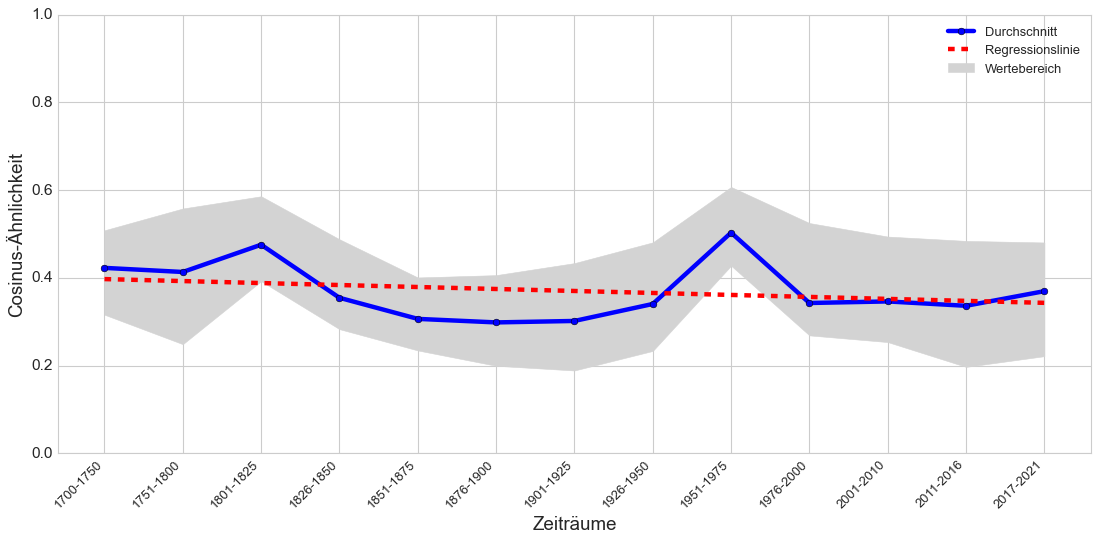

In [14]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(molto_mean)))
plt.xticks(ticks=x_indexes, labels=molto_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, molto_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, molto_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, molto_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, molto_max_list, molto_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### Kontrollgruppe - Quelldomäne

In [15]:
# domani 

domani1 = compare_cos(periods, models, 'domani', 'angoscia')
domani2 = compare_cos(periods, models, 'domani', 'atterrire')
domani3 = compare_cos(periods, models, 'domani', 'panico')
domani4 = compare_cos(periods, models, 'domani', 'paura')
domani5 = compare_cos(periods, models, 'domani', 'raccapricciare')
domani6 = compare_cos(periods, models, 'domani', 'schifo')
domani7 = compare_cos(periods, models, 'domani', 'sgomentare')
domani8 = compare_cos(periods, models, 'domani', 'sgomento')
domani9 = compare_cos(periods, models, 'domani', 'spaventare')
domani10 = compare_cos(periods, models, 'domani', 'spavento')
domani11 = compare_cos(periods, models, 'domani', 'terrore')

domani_df = pd.DataFrame([domani1, domani2, domani3, domani4, domani5, domani6, domani7, domani8, domani9, domani10, domani11])

# Durchschnitt pro Zeitraum
domani_mean = dict(domani_df.mean())

# min pro Zeitraum
domani_min = dict(domani_df.min())
domani_min_list = [float(x) for x in list(domani_min.values())]

#max pro Zeitraum 
domani_max = dict(domani_df.max())
domani_max_list = [float(x) for x in list(domani_max.values())]

In [16]:
# finora 

finora1 = compare_cos(periods, models, 'finora', 'angoscia')
finora2 = compare_cos(periods, models, 'finora', 'atterrire')
finora3 = compare_cos(periods, models, 'finora', 'panico')
finora4 = compare_cos(periods, models, 'finora', 'paura')
finora5 = compare_cos(periods, models, 'finora', 'raccapricciare')
finora6 = compare_cos(periods, models, 'finora', 'schifo')
finora7 = compare_cos(periods, models, 'finora', 'sgomentare')
finora8 = compare_cos(periods, models, 'finora', 'sgomento')
finora9 = compare_cos(periods, models, 'finora', 'spaventare')
finora10 = compare_cos(periods, models, 'finora', 'spavento')
finora11 = compare_cos(periods, models, 'finora', 'terrore')

finora_df = pd.DataFrame([finora1, finora2, finora3, finora4, finora5, finora6, finora7, finora8, finora9, finora10, finora11])

# Durchschnitt pro Zeitraum
finora_mean = dict(finora_df.mean())

# min pro Zeitraum
finora_min = dict(finora_df.min())
finora_min_list = [float(x) for x in list(finora_min.values())]

#max pro Zeitraum 
finora_max = dict(finora_df.max())
finora_max_list = [float(x) for x in list(finora_max.values())]

In [17]:
# ieri 

ieri1 = compare_cos(periods, models, 'ieri', 'angoscia')
ieri2 = compare_cos(periods, models, 'ieri', 'atterrire')
ieri3 = compare_cos(periods, models, 'ieri', 'panico')
ieri4 = compare_cos(periods, models, 'ieri', 'paura')
ieri5 = compare_cos(periods, models, 'ieri', 'raccapricciare')
ieri6 = compare_cos(periods, models, 'ieri', 'schifo')
ieri7 = compare_cos(periods, models, 'ieri', 'sgomentare')
ieri8 = compare_cos(periods, models, 'ieri', 'sgomento')
ieri9 = compare_cos(periods, models, 'ieri', 'spaventare')
ieri10 = compare_cos(periods, models, 'ieri', 'spavento')
ieri11 = compare_cos(periods, models, 'ieri', 'terrore')

ieri_df = pd.DataFrame([ieri1, ieri2, ieri3, ieri4, ieri5, ieri6, ieri7, ieri8, ieri9, ieri10, ieri11])

# Durchschnitt pro Zeitraum
ieri_mean = dict(ieri_df.mean())

# min pro Zeitraum
ieri_min = dict(ieri_df.min())
ieri_min_list = [float(x) for x in list(ieri_min.values())]

#max pro Zeitraum 
ieri_max = dict(ieri_df.max())
ieri_max_list = [float(x) for x in list(ieri_max.values())]

In [18]:
# oggi 

oggi1 = compare_cos(periods, models, 'oggi', 'angoscia')
oggi2 = compare_cos(periods, models, 'oggi', 'atterrire')
oggi3 = compare_cos(periods, models, 'oggi', 'panico')
oggi4 = compare_cos(periods, models, 'oggi', 'paura')
oggi5 = compare_cos(periods, models, 'oggi', 'raccapricciare')
oggi6 = compare_cos(periods, models, 'oggi', 'schifo')
oggi7 = compare_cos(periods, models, 'oggi', 'sgomentare')
oggi8 = compare_cos(periods, models, 'oggi', 'sgomento')
oggi9 = compare_cos(periods, models, 'oggi', 'spaventare')
oggi10 = compare_cos(periods, models, 'oggi', 'spavento')
oggi11 = compare_cos(periods, models, 'oggi', 'terrore')

oggi_df = pd.DataFrame([oggi1, oggi2, oggi3, oggi4, oggi5, oggi6, oggi7, oggi8, oggi9, oggi10, oggi11])

# Durchschnitt pro Zeitraum
oggi_mean = dict(oggi_df.mean())

# min pro Zeitraum
oggi_min = dict(oggi_df.min())
oggi_min_list = [float(x) for x in list(oggi_min.values())]

#max pro Zeitraum 
oggi_max = dict(oggi_df.max())
oggi_max_list = [float(x) for x in list(oggi_max.values())]

In [19]:
# presto 

presto1 = compare_cos(periods, models, 'presto', 'angoscia')
presto2 = compare_cos(periods, models, 'presto', 'atterrire')
presto3 = compare_cos(periods, models, 'presto', 'panico')
presto4 = compare_cos(periods, models, 'presto', 'paura')
presto5 = compare_cos(periods, models, 'presto', 'raccapricciare')
presto6 = compare_cos(periods, models, 'presto', 'schifo')
presto7 = compare_cos(periods, models, 'presto', 'sgomentare')
presto8 = compare_cos(periods, models, 'presto', 'sgomento')
presto9 = compare_cos(periods, models, 'presto', 'spaventare')
presto10 = compare_cos(periods, models, 'presto', 'spavento')
presto11 = compare_cos(periods, models, 'presto', 'terrore')

presto_df = pd.DataFrame([presto1, presto2, presto3, presto4, presto5, presto6, presto7, presto8, presto9, presto10, presto11])

# Durchschnitt pro Zeitraum
presto_mean = dict(presto_df.mean())

# min pro Zeitraum
presto_min = dict(presto_df.min())
presto_min_list = [float(x) for x in list(presto_min.values())]

#max pro Zeitraum 
presto_max = dict(presto_df.max())
presto_max_list = [float(x) for x in list(presto_max.values())]

In [20]:
# sempre 

sempre1 = compare_cos(periods, models, 'sempre', 'angoscia')
sempre2 = compare_cos(periods, models, 'sempre', 'atterrire')
sempre3 = compare_cos(periods, models, 'sempre', 'panico')
sempre4 = compare_cos(periods, models, 'sempre', 'paura')
sempre5 = compare_cos(periods, models, 'sempre', 'raccapricciare')
sempre6 = compare_cos(periods, models, 'sempre', 'schifo')
sempre7 = compare_cos(periods, models, 'sempre', 'sgomentare')
sempre8 = compare_cos(periods, models, 'sempre', 'sgomento')
sempre9 = compare_cos(periods, models, 'sempre', 'spaventare')
sempre10 = compare_cos(periods, models, 'sempre', 'spavento')
sempre11 = compare_cos(periods, models, 'sempre', 'terrore')

sempre_df = pd.DataFrame([sempre1, sempre2, sempre3, sempre4, sempre5, sempre6, sempre7, sempre8, sempre9, sempre10, sempre11])

# Durchschnitt pro Zeitraum
sempre_mean = dict(sempre_df.mean())

# min pro Zeitraum
sempre_min = dict(sempre_df.min())
sempre_min_list = [float(x) for x in list(sempre_min.values())]

#max pro Zeitraum 
sempre_max = dict(sempre_df.max())
sempre_max_list = [float(x) for x in list(sempre_max.values())]

In [21]:
# spesso 

spesso1 = compare_cos(periods, models, 'spesso', 'angoscia')
spesso2 = compare_cos(periods, models, 'spesso', 'atterrire')
spesso3 = compare_cos(periods, models, 'spesso', 'panico')
spesso4 = compare_cos(periods, models, 'spesso', 'paura')
spesso5 = compare_cos(periods, models, 'spesso', 'raccapricciare')
spesso6 = compare_cos(periods, models, 'spesso', 'schifo')
spesso7 = compare_cos(periods, models, 'spesso', 'sgomentare')
spesso8 = compare_cos(periods, models, 'spesso', 'sgomento')
spesso9 = compare_cos(periods, models, 'spesso', 'spaventare')
spesso10 = compare_cos(periods, models, 'spesso', 'spavento')
spesso11 = compare_cos(periods, models, 'spesso', 'terrore')

spesso_df = pd.DataFrame([spesso1, spesso2, spesso3, spesso4, spesso5, spesso6, spesso7, spesso8, spesso9, spesso10, spesso11])

# Durchschnitt pro Zeitraum
spesso_mean = dict(spesso_df.mean())

# min pro Zeitraum
spesso_min = dict(spesso_df.min())
spesso_min_list = [float(x) for x in list(spesso_min.values())]

#max pro Zeitraum 
spesso_max = dict(spesso_df.max())
spesso_max_list = [float(x) for x in list(spesso_max.values())]

#### Kontrollgruppe - Quelldomäne gesamt

In [22]:
# Durchschnitt gesamt

control_mean_df = pd.DataFrame([domani_mean, finora_mean, ieri_mean, oggi_mean, presto_mean, sempre_mean, spesso_mean])
control_mean = dict(control_mean_df.mean())

In [23]:
# min gesamt

control_min_df = pd.DataFrame([domani_min, finora_min, ieri_min, oggi_min, presto_min, sempre_min, spesso_min])
control_min = dict(control_min_df.min())
control_min_list = [float(x) for x in list(control_min.values())]

In [24]:
# max gesamt

control_max_df = pd.DataFrame([domani_max, finora_max, ieri_max, oggi_max, presto_max, sempre_max, spesso_max])
control_max = dict(control_max_df.max())
control_max_list = [float(x) for x in list(control_max.values())]

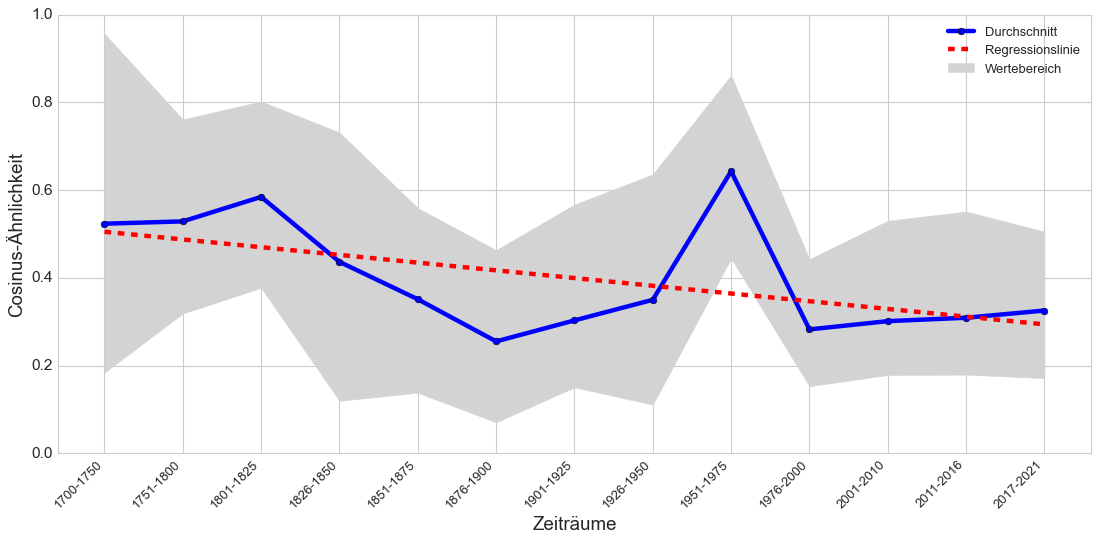

In [25]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(control_mean)))
plt.xticks(ticks=x_indexes, labels=control_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, control_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, control_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, control_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, control_max_list, control_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

## Adverbien

### atrocemente

In [26]:
compare_words(periods, models, 'atrocemente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(conoscer, 0.9896281361579895)","(annata, 0.9918124079704285)","(spregiata, 0.9932361841201782)","(riverire, 0.958882212638855)","(crudeltà, 0.9098188877105713)","(infliggere, 0.7523884177207947)","(cagion, 0.9173763990402222)","(umiliare, 0.9445679783821106)","(adorare, 0.98431795835495)","(atroce, 0.8407183289527893)","(torturare, 0.8659681081771851)","(torturare, 0.8864608407020569)","(atterrita, 0.8742337822914124)"
1,"(faciltà, 0.9890574812889099)","(overo, 0.9912911653518677)","(tenta, 0.9931783676147461)","(assalito, 0.954949140548706)","(bestiale, 0.905891478061676)","(inflessibile, 0.7439814209938049)","(sventurato, 0.9093862175941467)","(straziare, 0.9426693320274353)","(covare, 0.984119176864624)","(primitivo, 0.8399917483329773)","(mutilare, 0.8431128263473511)","(innocente, 0.8508893847465515)","(gola, 0.8709980249404907)"
2,"(confer, 0.9886515140533447)","(mugghiare, 0.9910271763801575)","(madri, 0.9924303889274597)","(discacciare, 0.9538978338241577)","(obbrobrio, 0.8995222449302673)","(insulto, 0.7404820322990417)","(riamare, 0.9038800597190857)","(attanagliare, 0.9420616626739502)","(hanan, 0.9836093187332153)","(eroico, 0.8364191651344299)","(orribilmente, 0.8389376997947693)","(perseguitare, 0.850768506526947)","(pianto, 0.8588628768920898)"
3,"(montan, 0.9885775446891785)","(anzich, 0.9906355142593384)","(moviam, 0.9921010732650757)","(profferta, 0.9537144303321838)","(spietato, 0.8961430788040161)","(persecuzione, 0.7360402345657349)","(compiangere, 0.8931785821914673)","(angosce, 0.9388965368270874)","(carlandrea, 0.9835467338562012)","(ferocia, 0.8355380296707153)","(orrendamente, 0.8371846675872803)","(inerme, 0.8422285318374634)","(demone, 0.856253445148468)"
4,"(involuto, 0.9883708357810974)","(merit, 0.9904319643974304)","(manlio, 0.9920104742050171)","(liberatore, 0.9534284472465515)","(insulto, 0.8932231664657593)","(inesorabilmente, 0.7313171625137329)","(adorata, 0.8890212178230286)","(nausea, 0.9377728700637817)","(azucena, 0.9833449721336365)","(odioso, 0.8344998359680176)","(sfigurare, 0.8344686627388)","(oltraggiare, 0.8399016261100769)","(sfigurare, 0.8513679504394531)"
5,"(dispacij, 0.988113522529602)","(volator, 0.9903571009635925)","(trojana, 0.9919605255126953)","(assassinare, 0.9527224898338318)","(crudelmente, 0.8897402882575989)","(umiltà, 0.7309236526489258)","(fors, 0.8869988322257996)","(torturare, 0.9374275803565979)","(patacca, 0.983279287815094)","(dolorosamente, 0.8344284892082214)","(dilaniare, 0.8253597021102905)","(vile, 0.8382638692855835)","(crudele, 0.850374162197113)"
6,"(pòi, 0.9881083369255066)","(incalzatosi, 0.9903227090835571)","(effigie, 0.9919461011886597)","(inimicare, 0.9526676535606384)","(disonorare, 0.8865232467651367)","(indomabile, 0.7218888998031616)","(straziare, 0.88670414686203)","(avidità, 0.9367460608482361)","(sperduto, 0.9828572869300842)","(schizofrenico, 0.8337501883506775)","(maledizione, 0.8227519392967224)","(matrigna, 0.8331046104431152)","(morso, 0.8435320258140564)"
7,"(glauco, 0.9875922799110413)","(cilmente, 0.9903208613395691)","(difensivo, 0.9919153451919556)","(amorevolmente, 0.9525195956230164)","(sfinimento, 0.8864667415618896)","(calunnia, 0.7216257452964783)","(torturare, 0.8858382701873779)","(rassegnazione, 0.9347969889640808)","(appoggiata, 0.9827974438667297)","(anoressia, 0.8316957950592041)","(gravemente, 0.8164215683937073)","(terrorizzare, 0.8297385573387146)","(angosciato, 0.8434812426567078)"
8,"(allogato, 0.9874733686447144)","(giudicai, 0.9900839924812317)","(cotta, 0.9918819069862366)","(vituperare, 0.9513114094734192)","(irritato, 0.8847914338111877)","(vilipendere, 0.7215487360954285)","(espiare, 0.8843485713005066)","(sovrumano, 0.9347026348114014)","(aguzzare, 0.9827106595039368)","(lineamento, 0.8301047682762146)","(crudeltà, 0.8151630759239197)","(brutale, 0.8272402882575989)","(gel

In [27]:
compare_cos(periods, models, 'atrocemente', 'molto')

{'1700-1750': 0.517425537109375,
 '1751-1800': 0.5512549877166748,
 '1801-1825': 0.48040470480918884,
 '1826-1850': 0.49587172269821167,
 '1851-1875': 0.5189500451087952,
 '1876-1900': 0.3729996681213379,
 '1901-1925': 0.5117467045783997,
 '1926-1950': 0.4515518546104431,
 '1951-1975': 0.5215722918510437,
 '1976-2000': 0.48757851123809814,
 '2001-2010': 0.44880813360214233,
 '2011-2016': 0.3684031069278717,
 '2017-2021': 0.4094406068325043}

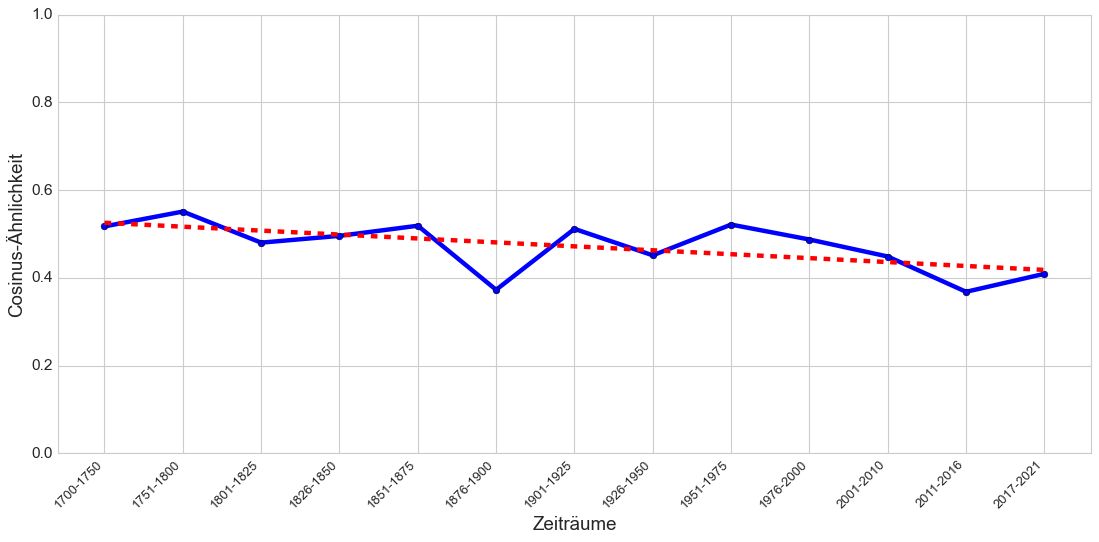

In [28]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

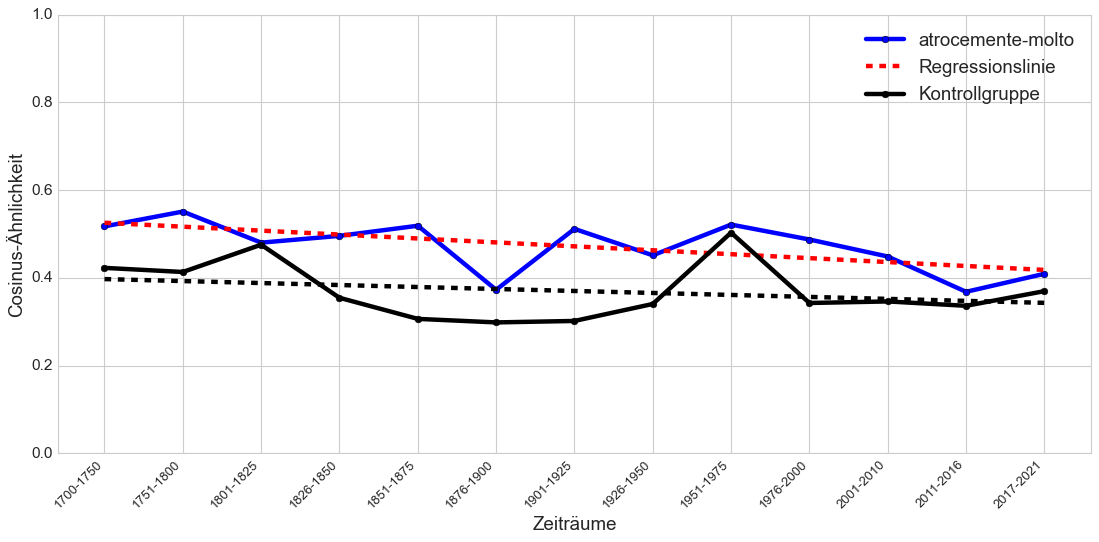

In [29]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right')

plt.show()

In [30]:
atrocemente1 = compare_cos(periods, models, 'atrocemente', 'angoscia')
atrocemente2 = compare_cos(periods, models, 'atrocemente', 'atterrire')
atrocemente3 = compare_cos(periods, models, 'atrocemente', 'panico')
atrocemente4 = compare_cos(periods, models, 'atrocemente', 'paura')
atrocemente5 = compare_cos(periods, models, 'atrocemente', 'raccapricciare')
atrocemente6 = compare_cos(periods, models, 'atrocemente', 'schifo')
atrocemente7 = compare_cos(periods, models, 'atrocemente', 'sgomentare')
atrocemente8 = compare_cos(periods, models, 'atrocemente', 'sgomento')
atrocemente9 = compare_cos(periods, models, 'atrocemente', 'spaventare')
atrocemente10 = compare_cos(periods, models, 'atrocemente', 'spavento')
atrocemente11 = compare_cos(periods, models, 'atrocemente', 'terrore')

In [31]:
atrocemente1

{'1700-1750': 0.9087392687797546,
 '1751-1800': 0.7502119541168213,
 '1801-1825': 0.6910832524299622,
 '1826-1850': 0.6012938022613525,
 '1851-1875': 0.5713779926300049,
 '1876-1900': 0.5430886745452881,
 '1901-1925': 0.5727363228797913,
 '1926-1950': 0.6573504209518433,
 '1951-1975': 0.8236367702484131,
 '1976-2000': 0.4362027049064636,
 '2001-2010': 0.5930672287940979,
 '2011-2016': 0.6147016286849976,
 '2017-2021': 0.6747666001319885}

In [32]:
atrocemente_df = pd.DataFrame([atrocemente1, atrocemente2, atrocemente3, atrocemente4, atrocemente5, atrocemente6, atrocemente7, atrocemente8, atrocemente9, atrocemente10, atrocemente11])

# Durchschnitt pro Zeitraum
atrocemente_mean = dict(atrocemente_df.mean())

# min pro Zeitraum
atrocemente_min = dict(atrocemente_df.min())
atrocemente_min_list = [float(x) for x in list(atrocemente_min.values())]

#max pro Zeitraum 
atrocemente_max = dict(atrocemente_df.max())
atrocemente_max_list = [float(x) for x in list(atrocemente_max.values())]

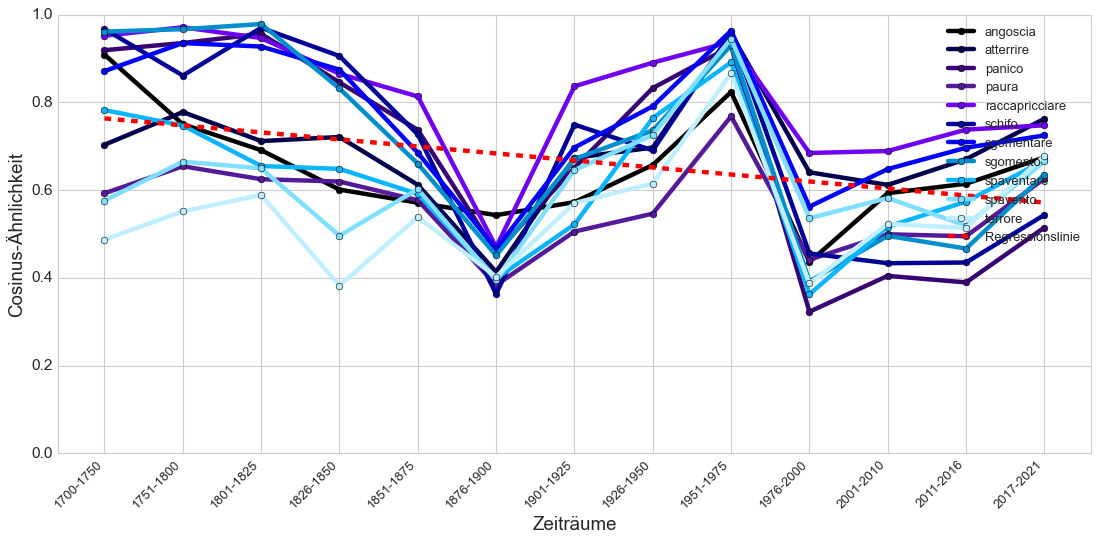

In [33]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, atrocemente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, atrocemente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, atrocemente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, atrocemente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, atrocemente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, atrocemente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, atrocemente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, atrocemente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, atrocemente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, atrocemente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

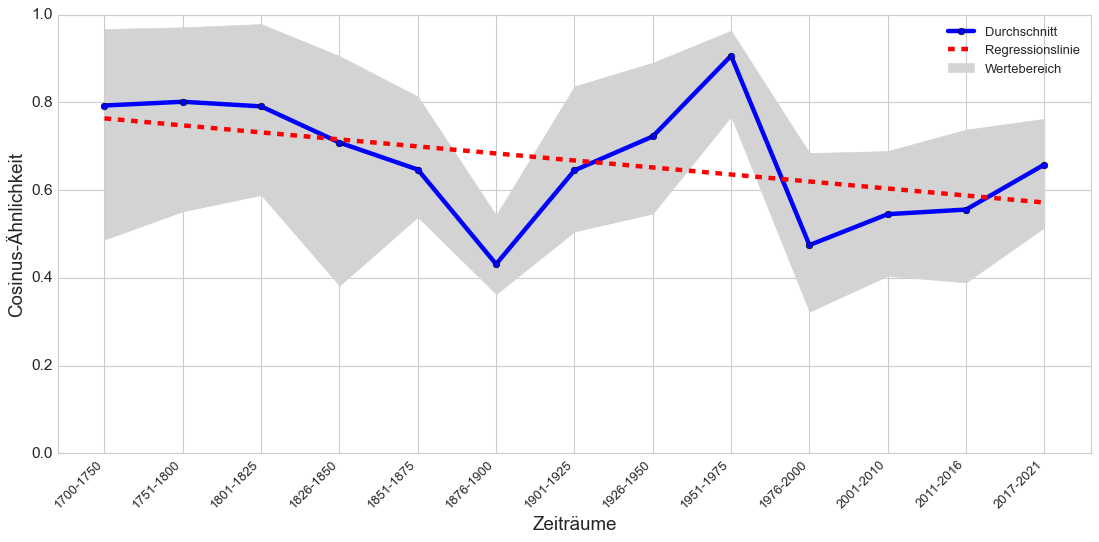

In [34]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

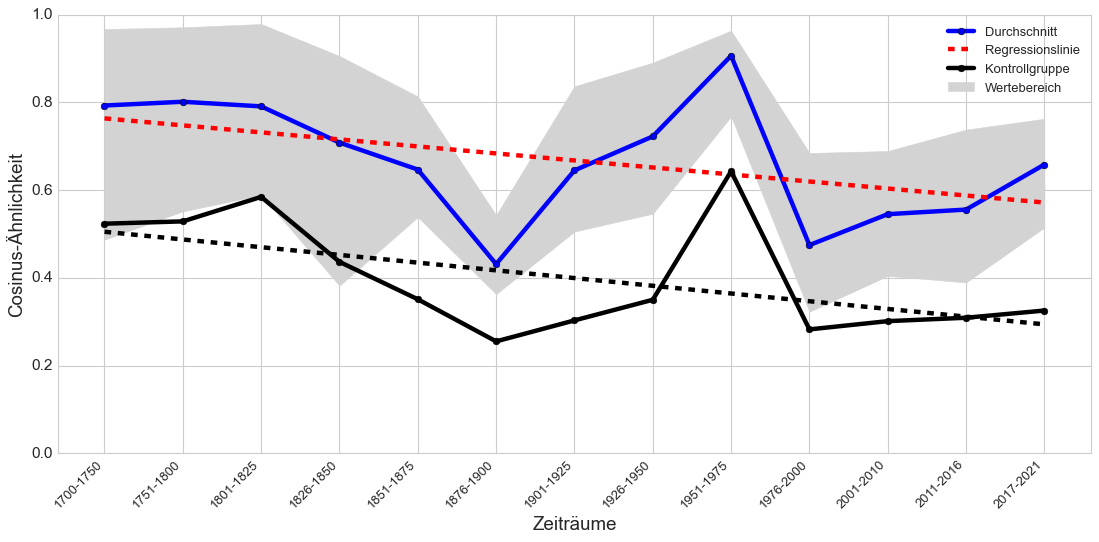

In [35]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

#Kontrollgruppe
plt.plot(x_indexes, control_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### formidabilmente

In [36]:
compare_words(periods, models, 'formidabilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,not in vocab,not in vocab,not in vocab,"(duodecime, 0.9898521900177002)","(fuscello, 0.9808155298233032)","(impallidita, 0.9482629895210266)","(proboscide, 0.9749289155006409)","(prettamente, 0.9891003966331482)",not in vocab,"(mitteleuropa, 0.9770439863204956)","(smisurato, 0.9332318305969238)","(pel, 0.9410384297370911)","(sotteso, 0.9448122978210449)"
1,not in vocab,not in vocab,not in vocab,"(strabocchevole, 0.9891642332077026)","(mojar, 0.9782974720001221)","(pizzicottare, 0.9476896524429321)","(avvent, 0.9738677740097046)","(colonato, 0.9883111715316772)",not in vocab,"(sofisticati, 0.974775493144989)","(annidare, 0.9281627535820007)","(cosmico, 0.9388158321380615)","(antropologico, 0.9437754154205322)"
2,not in vocab,not in vocab,not in vocab,"(parvas, 0.9887791275978088)","(bufala, 0.9780145287513733)","(assiderare, 0.9451993107795715)","(gonga, 0.9718719720840454)","(eccezionalmente, 0.9882588982582092)",not in vocab,"(macintosh, 0.9744852781295776)","(insito, 0.9265459179878235)","(disordinato, 0.9382811784744263)","(trascendere, 0.943325400352478)"
3,not in vocab,not in vocab,not in vocab,"(longo, 0.9886155128479004)","(avversarlo, 0.9768059253692627)","(miagolare, 0.9443202614784241)","(fucileria, 0.971420407295227)","(insostituibile, 0.9881396293640137)",not in vocab,"(antartico, 0.9737679958343506)","(cibernetico, 0.9263597130775452)","(pregno, 0.938270092010498)","(autodistruzione, 0.9432810544967651)"
4,not in vocab,not in vocab,not in vocab,"(joseph, 0.9882468581199646)","(acquaio, 0.9765854477882385)","(euforione, 0.9443071484565735)","(bussò, 0.970755934715271)","(praticismo, 0.9872286915779114)",not in vocab,"(errante, 0.9729962944984436)","(stritolare, 0.9248049259185791)","(subconscio, 0.9382208585739136)","(empatica, 0.9427581429481506)"
5,not in vocab,not in vocab,not in vocab,"(ipocondriaco, 0.9881809949874878)","(fattine, 0.9760661125183105)","(dolorose, 0.9440526366233826)","(spessore, 0.9704453349113464)","(esserenostro, 0.9871930480003357)",not in vocab,"(europeizzare, 0.9729520082473755)","(fardello, 0.9206865429878235)","(sovrannaturale, 0.9379981756210327)","(coesistere, 0.94141685962677)"
6,not in vocab,not in vocab,not in vocab,"(vòlto, 0.9880225658416748)","(antimonio, 0.9759472012519836)","(rattrappire, 0.9427162408828735)","(punt, 0.969951868057251)","(mendeleev, 0.9871546030044556)",not in vocab,"(chioggia, 0.9728139638900757)","(bestiale, 0.9203027486801147)","(simbiosi, 0.9377009868621826)","(storiografico, 0.9413067698478699)"
7,not in vocab,not in vocab,not in vocab,"(plura, 0.9878495931625366)","(rapir, 0.9757443070411682)","(appressò, 0.9419494867324829)","(incammin, 0.9697275161743164)","(isacco, 0.9870550632476807)",not in vocab,"(gambia, 0.9721696376800537)","(sfuggente, 0.9202507734298706)","(distorcere, 0.9373216032981873)","(espressività, 0.9406401515007019)"
8,not in vocab,not in vocab,not in vocab,"(scandinavo, 0.9878408908843994)","(sottostà, 0.9755632877349854)","(cullavano, 0.9416205286979675)","(ansa, 0.9697016477584839)","(degradazione, 0.9869154691696167)",not in vocab,"(popolato, 0.9716022610664368)","(esteriore, 0.9195898771286011)","(similitudine, 0.93678218126297)","(vastità, 0.9404101371765137)"
9,not in vocab,not in vocab,not in vocab,"(socini, 0.987682044506073)","(aqueo, 0.9754122495651245)","(accarezzandomi, 0.9416013956069946)","(paravento, 0.9692896604537964)","(comfort, 0.9868984222412109)",not in vocab,"(lavoisier, 0.9713632464408875)","(purificare, 0.9188870787620544)","(intrinsecamente, 0.9355420470237732)","(immutabile, 0.9395103454589844)"


In [37]:
compare_cos(periods, models, 'formidabilmente', 'molto')

{'1826-1850': 0.47445034980773926,
 '1851-1875': 0.45532941818237305,
 '1876-1900': 0.48037391901016235,
 '1901-1925': 0.43503710627555847,
 '1926-1950': 0.5046107172966003,
 '1976-2000': 0.5055525302886963,
 '2001-2010': 0.5217382311820984,
 '2011-2016': 0.5909808874130249,
 '2017-2021': 0.5289960503578186}

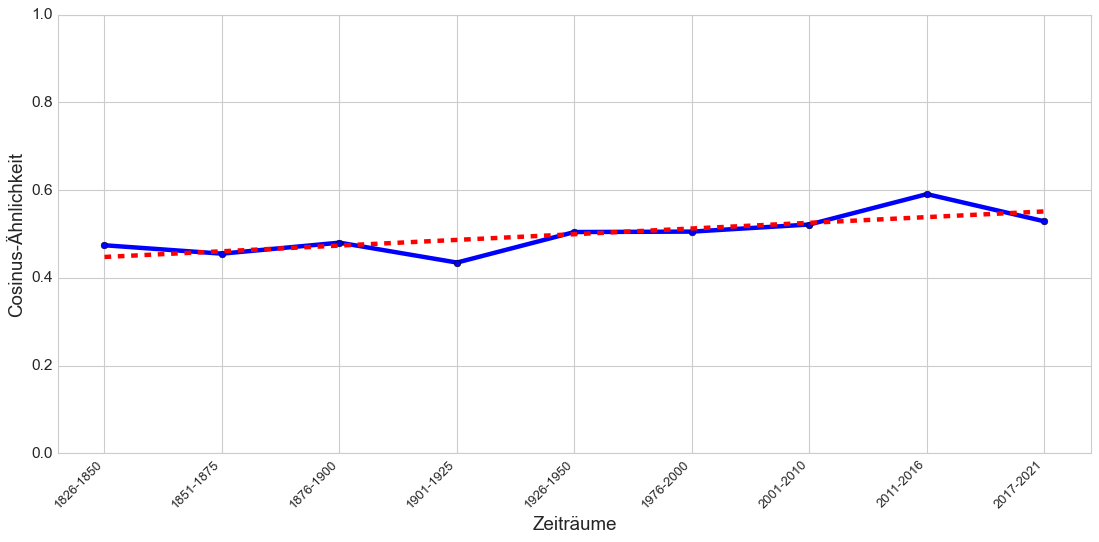

In [51]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'formidabilmente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [39]:
formidabilmente1 = compare_cos(periods, models, 'formidabilmente', 'angoscia')
formidabilmente2 = compare_cos(periods, models, 'formidabilmente', 'atterrire')
formidabilmente3 = compare_cos(periods, models, 'formidabilmente', 'panico')
formidabilmente4 = compare_cos(periods, models, 'formidabilmente', 'paura')
formidabilmente5 = compare_cos(periods, models, 'formidabilmente', 'raccapricciare')
formidabilmente6 = compare_cos(periods, models, 'formidabilmente', 'schifo')
formidabilmente7 = compare_cos(periods, models, 'formidabilmente', 'sgomentare')
formidabilmente8 = compare_cos(periods, models, 'formidabilmente', 'sgomento')
formidabilmente9 = compare_cos(periods, models, 'formidabilmente', 'spaventare')
formidabilmente10 = compare_cos(periods, models, 'formidabilmente', 'spavento')
formidabilmente11 = compare_cos(periods, models, 'formidabilmente', 'terrore')

In [40]:
formidabilmente_df = pd.DataFrame([formidabilmente1, formidabilmente2, formidabilmente3, formidabilmente4, formidabilmente5, formidabilmente6, formidabilmente7, formidabilmente8, formidabilmente9, formidabilmente10, formidabilmente11])

# Durchschnitt pro Zeitraum
formidabilmente_mean = dict(formidabilmente_df.mean())

# min pro Zeitraum
formidabilmente_min = dict(formidabilmente_df.min())
formidabilmente_min_list = [float(x) for x in list(formidabilmente_min.values())]

#max pro Zeitraum 
formidabilmente_max = dict(formidabilmente_df.max())
formidabilmente_max_list = [float(x) for x in list(formidabilmente_max.values())]

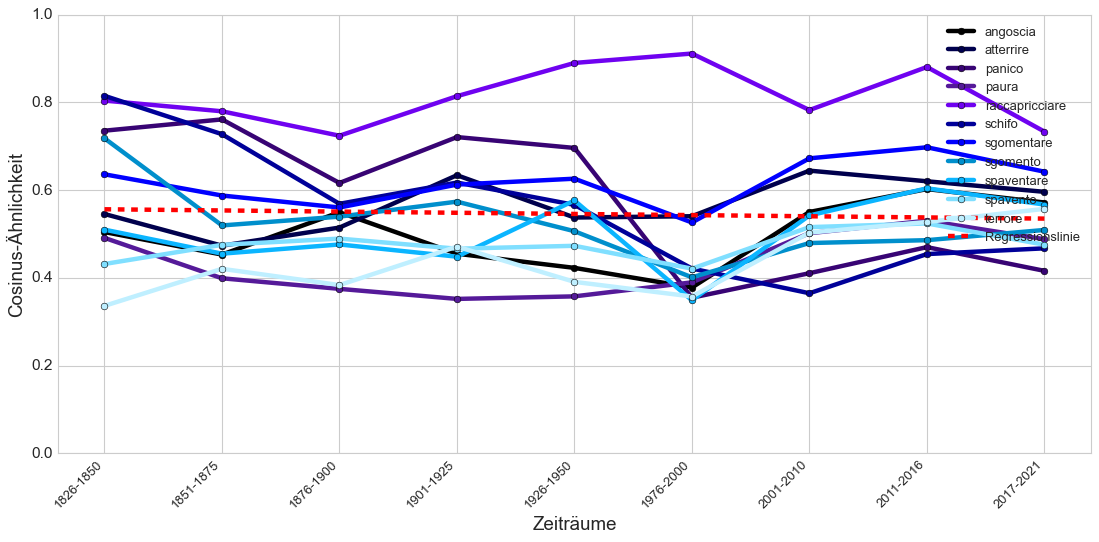

In [41]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(formidabilmente_mean)))
plt.xticks(ticks=x_indexes, labels=formidabilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, formidabilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, formidabilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, formidabilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, formidabilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, formidabilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, formidabilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, formidabilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, formidabilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, formidabilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, formidabilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, formidabilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, formidabilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(formidabilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

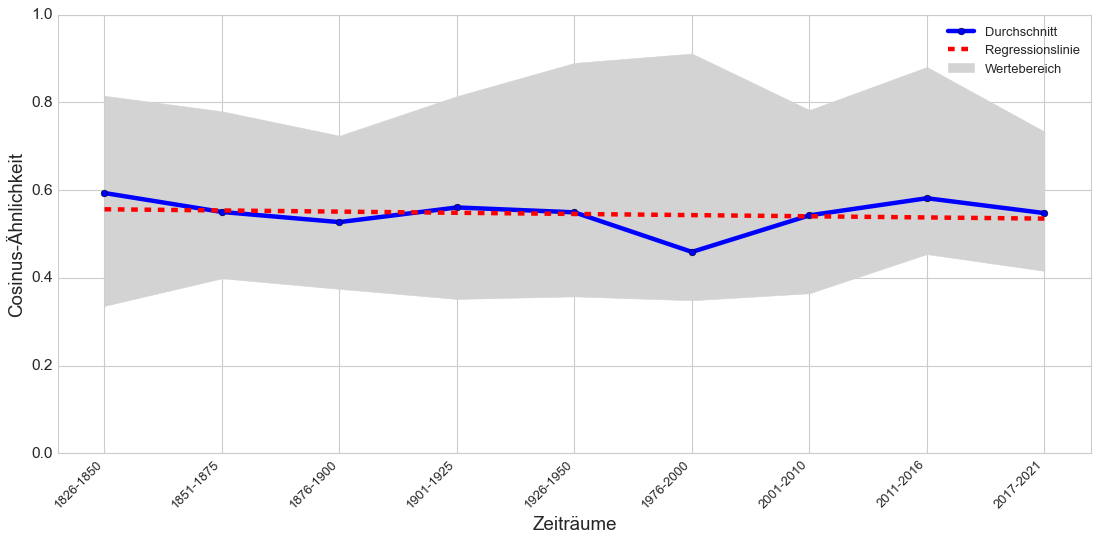

In [42]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(formidabilmente_mean)))
plt.xticks(ticks=x_indexes, labels=formidabilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, formidabilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, formidabilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, formidabilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, formidabilmente_max_list, formidabilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(formidabilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### mostruosamente

In [43]:
compare_words(periods, models, 'mostruosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(cipiglio, 0.9888620376586914)",not in vocab,"(elicona, 0.9926237463951111)","(vei, 0.9875006079673767)","(morboso, 0.9553850293159485)","(congegno, 0.8985509872436523)","(avverse, 0.9649971127510071)","(umor, 0.9827536344528198)","(scherzosamente, 0.9938024282455444)","(egoista, 0.8634977340698242)","(spaventosamente, 0.8205793499946594)","(incredibilmente, 0.8351675868034363)","(spaventosamente, 0.8420299291610718)"
1,"(svogliatezza, 0.9883443713188171)",not in vocab,"(stabat, 0.9924997091293335)","(ennio, 0.9859653115272522)","(schiettezza, 0.9519172310829163)","(improvvisa, 0.8944514393806458)","(significazione, 0.9634681344032288)","(ulivigno, 0.9801227450370789)","(labile, 0.9933098554611206)","(dotato, 0.8534383177757263)","(coinvolgente, 0.8167524337768555)","(spaventosamente, 0.8277563452720642)","(talmente, 0.8177384734153748)"
2,"(quque, 0.9882186055183411)",not in vocab,"(etna, 0.9922640323638916)","(urbanit, 0.9852951169013977)","(inorgoglire, 0.950655460357666)","(veemente, 0.8920531868934631)","(definito, 0.9579377770423889)","(falange, 0.9799280762672424)","(ossessione, 0.9925759434700012)","(spaventosamente, 0.8461815118789673)","(geniale, 0.8045481443405151)","(straordinariamente, 0.8196353316307068)","(incredibilmente, 0.8000674843788147)"
3,"(cristofano, 0.9880877733230591)",not in vocab,"(festante, 0.9921781420707703)","(disdirsi, 0.9849988222122192)","(diffidente, 0.9484642744064331)","(sensibilit, 0.8919309377670288)","(mutevole, 0.9550343155860901)","(mongolfiera, 0.979663610458374)","(piena, 0.9925313591957092)","(eleganza, 0.8376547694206238)","(estremamente, 0.8027387857437134)","(talmente, 0.8163576722145081)","(tremendamente, 0.7979291677474976)"
4,"(miserando, 0.987987220287323)",not in vocab,"(palermitano, 0.992093563079834)","(fantoni, 0.984711766242981)","(portentoso, 0.9484525322914124)","(sovrabbondanza, 0.8900903463363647)","(veggono, 0.9531236886978149)","(rimpicciolisce, 0.9794642925262451)","(ammonimento, 0.9925066828727722)","(infinitamente, 0.8361186981201172)","(tremendamente, 0.7972805500030518)","(alquanto, 0.8121851086616516)","(terribilmente, 0.7809638381004333)"
5,"(catholici, 0.9878952503204346)",not in vocab,"(cerigo, 0.9919092655181885)","(dissonante, 0.9844534397125244)","(incurabile, 0.9483717083930969)","(investigatore, 0.8893908262252808)","(apparato, 0.9515371322631836)","(spiovere, 0.9791842699050903)","(sovrannaturale, 0.9922608733177185)","(orripilante, 0.8339404463768005)","(incredibilmente, 0.7971784472465515)","(leggerezza, 0.8060665726661682)","(crudo, 0.7785831689834595)"
6,"(fiammella, 0.9878354668617249)",not in vocab,"(dellistria, 0.9917798638343811)","(sermon, 0.9843723773956299)","(triviale, 0.9478040933609009)","(urtò, 0.8871975541114807)","(modellare, 0.9510673880577087)","(frontale, 0.9790889024734497)","(sdolcinato, 0.9921844005584717)","(sobrio, 0.8310768008232117)","(talmente, 0.7942774295806885)","(superficiale, 0.8008052706718445)","(cinico, 0.778415322303772)"
7,"(archiepiscopus, 0.9877657890319824)",not in vocab,"(pinte, 0.9917557239532471)","(compositione, 0.9843440651893616)","(vanitoso, 0.9471924901008606)","(allettamento, 0.8868272304534912)","(originare, 0.95069819688797)","(fattasi, 0.9785891771316528)","(compenetrazione, 0.9921342730522156)","(arido, 0.8301655054092407)","(alquanto, 0.7935407161712646)","(accattivante, 0.7982064485549927)","(innocuo, 0.7625585198402405)"
8,"(unoda, 0.9875662922859192)",not in vocab,"(faon, 0.991753339767456)","(orfanella, 0.9840943217277527)","(alterigia, 0.9467923045158386)","(impudenza, 0.8848101496696472)","(esplicazione, 0.9502450823783875)","(cicatrice, 0.9780861139297485)","(sinuoso, 0.9918873310089111)","(humour, 0.830162763595581)","(crudo, 0.7930499911308289)","(sensuale, 0.7957310080528259)","(genuino, 0.7616631984710693)"
9,"(restia, 0.9875168204307556)",not in vocab,

In [44]:
compare_cos(periods, models, 'mostruosamente', 'molto')

{'1700-1750': 0.49338439106941223,
 '1801-1825': 0.47538211941719055,
 '1826-1850': 0.5157192945480347,
 '1851-1875': 0.594621479511261,
 '1876-1900': 0.5039764642715454,
 '1901-1925': 0.49220356345176697,
 '1926-1950': 0.49493518471717834,
 '1951-1975': 0.5662168860435486,
 '1976-2000': 0.6166523098945618,
 '2001-2010': 0.6421700716018677,
 '2011-2016': 0.6623972654342651,
 '2017-2021': 0.5886260867118835}

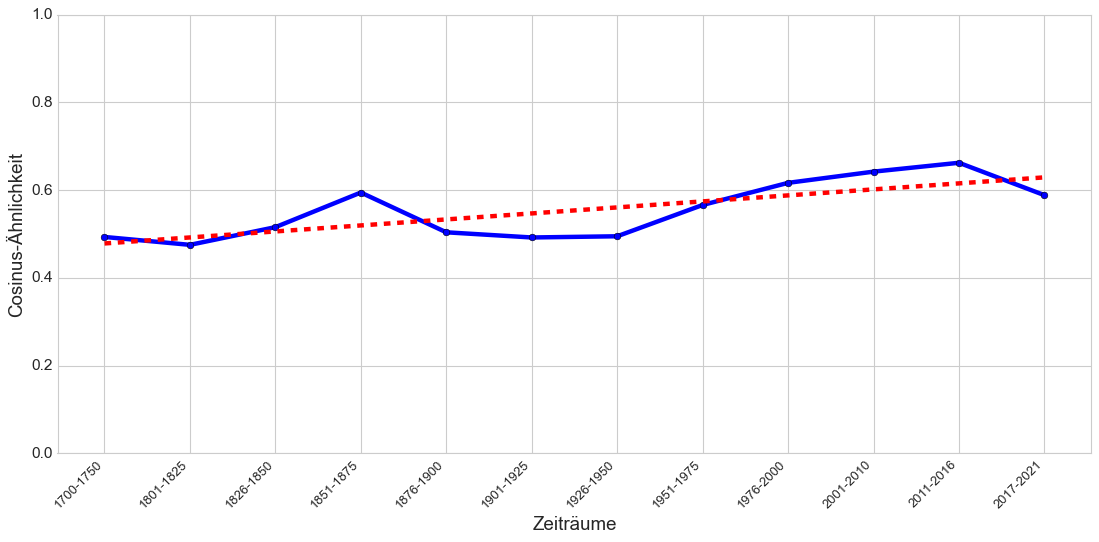

In [53]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'mostruosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='mostruosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [54]:
mostruosamente1 = compare_cos(periods, models, 'mostruosamente', 'angoscia')
mostruosamente2 = compare_cos(periods, models, 'mostruosamente', 'atterrire')
mostruosamente3 = compare_cos(periods, models, 'mostruosamente', 'panico')
mostruosamente4 = compare_cos(periods, models, 'mostruosamente', 'paura')
mostruosamente5 = compare_cos(periods, models, 'mostruosamente', 'raccapricciare')
mostruosamente6 = compare_cos(periods, models, 'mostruosamente', 'schifo')
mostruosamente7 = compare_cos(periods, models, 'mostruosamente', 'sgomentare')
mostruosamente8 = compare_cos(periods, models, 'mostruosamente', 'sgomento')
mostruosamente9 = compare_cos(periods, models, 'mostruosamente', 'spaventare')
mostruosamente10 = compare_cos(periods, models, 'mostruosamente', 'spavento')
mostruosamente11 = compare_cos(periods, models, 'mostruosamente', 'terrore')

In [55]:
mostruosamente_df = pd.DataFrame([mostruosamente1, mostruosamente2, mostruosamente3, mostruosamente4, mostruosamente5, mostruosamente6, mostruosamente7, mostruosamente8, mostruosamente9, mostruosamente10, mostruosamente11])

# Durchschnitt pro Zeitraum
mostruosamente_mean = dict(mostruosamente_df.mean())

# min pro Zeitraum
mostruosamente_min = dict(mostruosamente_df.min())
mostruosamente_min_list = [float(x) for x in list(mostruosamente_min.values())]

#max pro Zeitraum 
mostruosamente_max = dict(mostruosamente_df.max())
mostruosamente_max_list = [float(x) for x in list(mostruosamente_max.values())]

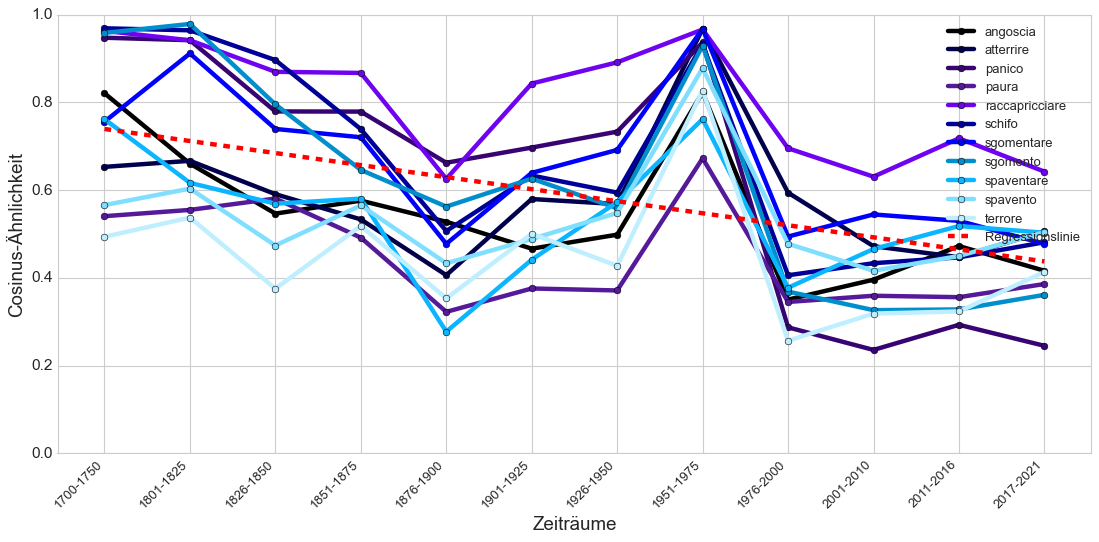

In [56]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, mostruosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, mostruosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, mostruosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, mostruosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, mostruosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, mostruosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, mostruosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, mostruosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, mostruosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, mostruosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

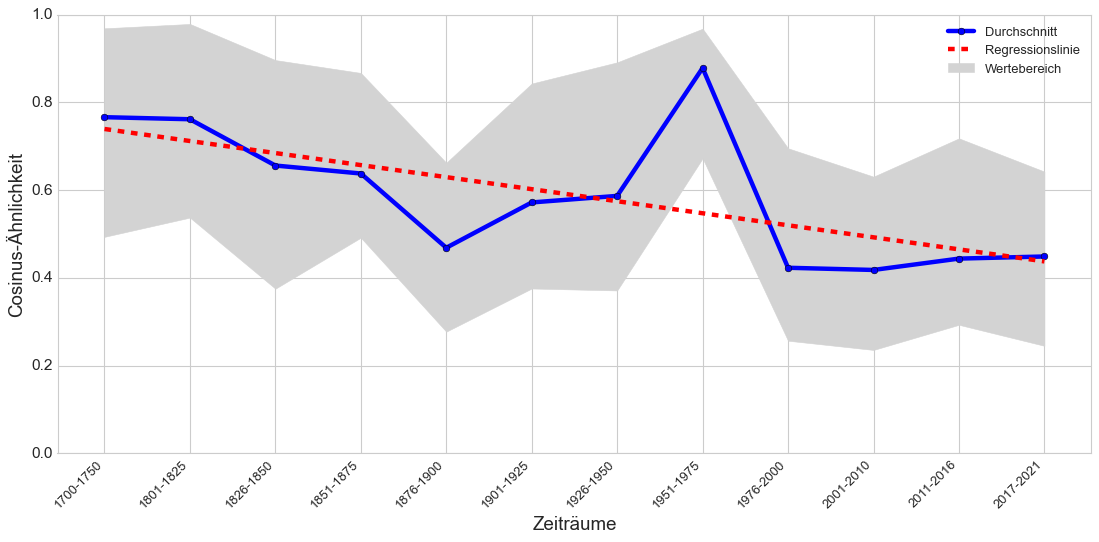

In [49]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, mostruosamente_max_list, mostruosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orrendamente

In [57]:
compare_words(periods, models, 'orrendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,not in vocab,not in vocab,"(vivificante, 0.9927748441696167)","(ciprigna, 0.9824993014335632)","(inumidire, 0.9498053789138794)","(imporporare, 0.8733888864517212)","(ruggiva, 0.9452328681945801)","(riposato, 0.972241997718811)","(danzatrice, 0.9957186579704285)","(mutilare, 0.9073293209075928)","(mutilare, 0.8777994513511658)","(mutilare, 0.9111844897270203)","(orribilmente, 0.8837073445320129)"
1,not in vocab,not in vocab,"(mandra, 0.9926729202270508)","(formidato, 0.9823585152626038)","(vampa, 0.9379361867904663)","(tetra, 0.8705983757972717)","(agghiacciare, 0.9431332349777222)","(longwy, 0.9660987257957458)","(orda, 0.9955441951751709)","(orribilmente, 0.8903392553329468)","(orribilmente, 0.8775120973587036)","(orribilmente, 0.8886086940765381)","(mutilare, 0.8748930096626282)"
2,not in vocab,not in vocab,"(scorrenti, 0.992186427116394)","(fregiare, 0.9823046922683716)","(sanguigno, 0.9326626658439636)","(arsura, 0.8705105185508728)","(buttatasi, 0.9363895058631897)","(percosso, 0.9632648229598999)","(peccatrice, 0.9955090284347534)","(sfigurato, 0.8749125003814697)","(atrocemente, 0.8371847867965698)","(sfigurato, 0.8590672016143799)","(sfigurare, 0.8646392822265625)"
3,not in vocab,not in vocab,"(ammantare, 0.9920654296875)","(cantici, 0.9822683334350586)","(tinto, 0.9315785765647888)","(appannare, 0.8704657554626465)","(leccare, 0.9356750845909119)","(liquefare, 0.9625853300094604)","(esiliare, 0.9954717755317688)","(straziato, 0.859898030757904)","(sfigurato, 0.8338091969490051)","(straziare, 0.8436235189437866)","(sfigurato, 0.8489149808883667)"
4,not in vocab,not in vocab,"(maestade, 0.9919769763946533)","(sparto, 0.982199490070343)","(vellutato, 0.9307224154472351)","(sbiancare, 0.8686831593513489)","(virgole, 0.9350916743278503)","(prude, 0.9625802040100098)","(dislocare, 0.9954149127006531)","(sfigurati, 0.8458948731422424)","(sfigurare, 0.8293813467025757)","(sfigurare, 0.8309066295623779)","(straziato, 0.8394197821617126)"
5,not in vocab,not in vocab,"(caucaso, 0.9919041395187378)","(svégliati, 0.9812485575675964)","(smorto, 0.92847740650177)","(corvino, 0.866129994392395)","(scomposto, 0.9339651465415955)","(fiacco, 0.9621014595031738)","(semicerchio, 0.9953684210777283)","(mutilato, 0.8458612561225891)","(torturare, 0.8128154873847961)","(torturare, 0.8211978077888489)","(atrocemente, 0.8286978006362915)"
6,not in vocab,not in vocab,"(parapetto, 0.9917882084846497)","(flegra, 0.9809063076972961)","(gonfiare, 0.92792809009552)","(dimagrire, 0.8632808923721313)","(animoso, 0.9334955811500549)","(laceramenti, 0.961646556854248)","(nsavan, 0.9951550960540771)","(ustionato, 0.8254576921463013)","(deturpare, 0.8108466267585754)","(atrocemente, 0.8179689049720764)","(serpente, 0.8131200671195984)"
7,not in vocab,not in vocab,"(incavare, 0.9917069673538208)","(balzar, 0.9805060625076294)","(lampeggiare, 0.9277138113975525)","(pallor, 0.862041175365448)","(schiacciato, 0.9332872629165649)","(tragicamente, 0.9614526033401489)","(eschimese, 0.9951430559158325)","(cadavere, 0.8161200284957886)","(straziato, 0.7933101058006287)","(bestia, 0.8146165609359741)","(seviziare, 0.8015781044960022)"
8,not in vocab,not in vocab,"(scorrevole, 0.9917055368423462)","(fida, 0.980379581451416)","(scintillanti, 0.9241507053375244)","(stecchire, 0.8619248270988464)","(sputi, 0.9331969022750854)","(inebriante, 0.9609618782997131)","(lacero, 0.9951402544975281)","(sfigurare, 0.8141632676124573)","(killer, 0.7778664827346802)","(atterrite, 0.8125335574150085)","(atterrita, 0.7986201047897339)"
9,not in vocab,not in vocab,"(cangia, 0.9915435314178467)","(lacerato, 0.9797855615615845)","(sfavillare, 0.9239622950553894)","(arrossare, 0.859890341758728)","(sgorgassero, 0.9328493475914001)","(argonne, 0.9601447582244873)","(mirino, 0.9949302077293396)","(stuprare, 0.8079338669776917)","(deformare, 0.77687156200408

In [58]:
compare_cos(periods, models, 'orrendamente', 'molto')

{'1801-1825': 0.5522257089614868,
 '1826-1850': 0.473300963640213,
 '1851-1875': 0.4254589378833771,
 '1876-1900': 0.433671772480011,
 '1901-1925': 0.432939350605011,
 '1926-1950': 0.45414304733276367,
 '1951-1975': 0.48772838711738586,
 '1976-2000': 0.2151830643415451,
 '2001-2010': 0.32483792304992676,
 '2011-2016': 0.30854350328445435,
 '2017-2021': 0.3568192422389984}

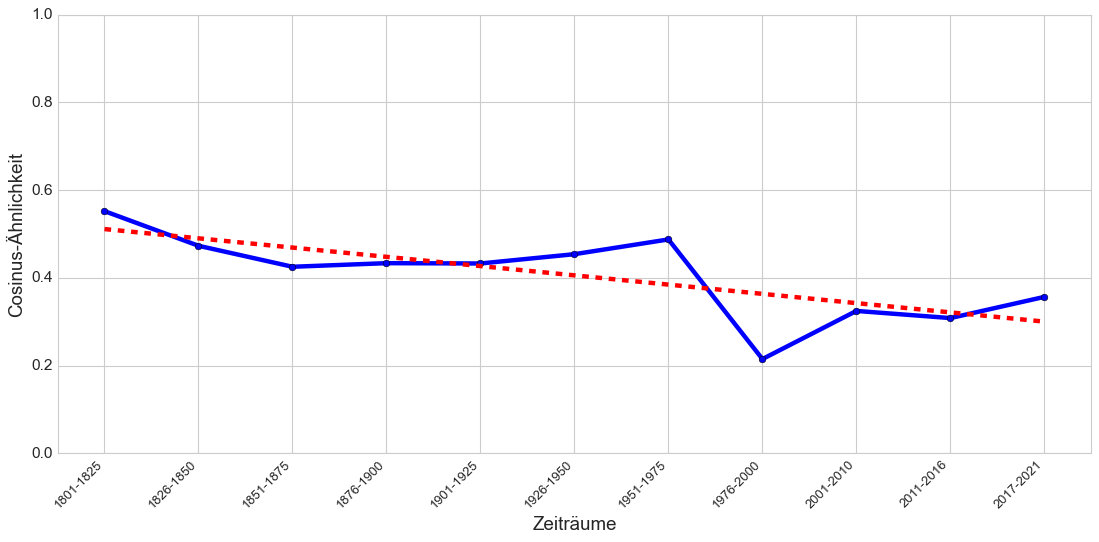

In [59]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orrendamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='orrendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [60]:
orrendamente1 = compare_cos(periods, models, 'orrendamente', 'angoscia')
orrendamente2 = compare_cos(periods, models, 'orrendamente', 'atterrire')
orrendamente3 = compare_cos(periods, models, 'orrendamente', 'panico')
orrendamente4 = compare_cos(periods, models, 'orrendamente', 'paura')
orrendamente5 = compare_cos(periods, models, 'orrendamente', 'raccapricciare')
orrendamente6 = compare_cos(periods, models, 'orrendamente', 'schifo')
orrendamente7 = compare_cos(periods, models, 'orrendamente', 'sgomentare')
orrendamente8 = compare_cos(periods, models, 'orrendamente', 'sgomento')
orrendamente9 = compare_cos(periods, models, 'orrendamente', 'spaventare')
orrendamente10 = compare_cos(periods, models, 'orrendamente', 'spavento')
orrendamente11 = compare_cos(periods, models, 'orrendamente', 'terrore')

In [61]:
orrendamente_df = pd.DataFrame([orrendamente1, orrendamente2, orrendamente3, orrendamente4, orrendamente5, orrendamente6, orrendamente7, orrendamente8, orrendamente9, orrendamente10, orrendamente11])

# Durchschnitt pro Zeitraum
orrendamente_mean = dict(orrendamente_df.mean())

# min pro Zeitraum
orrendamente_min = dict(orrendamente_df.min())
orrendamente_min_list = [float(x) for x in list(orrendamente_min.values())]

#max pro Zeitraum 
orrendamente_max = dict(orrendamente_df.max())
orrendamente_max_list = [float(x) for x in list(orrendamente_max.values())]

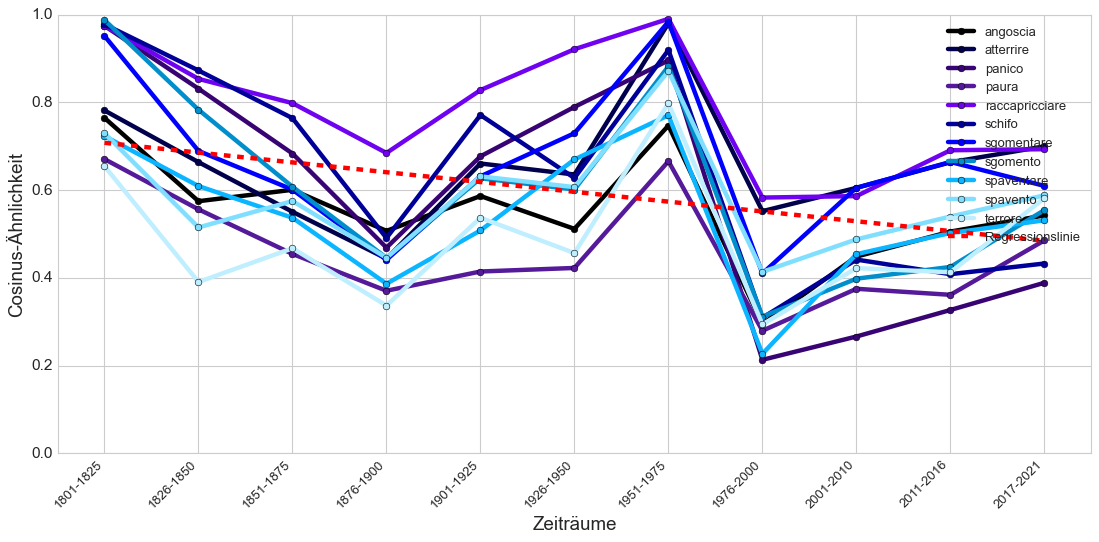

In [62]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orrendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orrendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orrendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orrendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orrendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orrendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orrendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orrendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orrendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orrendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

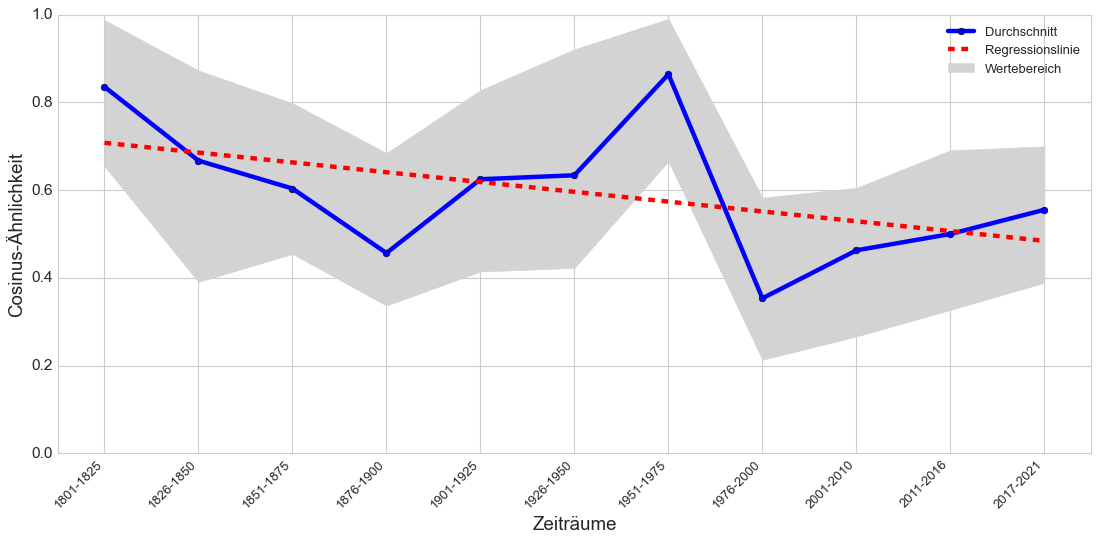

In [63]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orrendamente_max_list, orrendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orribilmente

In [64]:
compare_words(periods, models, 'orribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(aquilonar, 0.9839230179786682)","(agonia, 0.9746809005737305)","(morente, 0.9674233198165894)","(lido, 0.9322285056114197)","(pallore, 0.8965504765510559)","(contrazione, 0.6956614255905151)","(stomaco, 0.7921348214149475)","(spaventosamente, 0.899337649345398)","(bruciato, 0.9903215169906616)","(mutilare, 0.9008229374885559)","(orrendamente, 0.8775121569633484)","(orrendamente, 0.8886086940765381)","(orrendamente, 0.8837073445320129)"
1,"(grandine, 0.9826650023460388)","(rivi, 0.9712254405021667)","(redentor, 0.9655497670173645)","(traversare, 0.9280357956886292)","(tremito, 0.8584299683570862)","(arteria, 0.69228595495224)","(orrendamente, 0.7899687886238098)","(impallidire, 0.8745087385177612)","(musulmano, 0.9900662899017334)","(orrendamente, 0.8903392553329468)","(atrocemente, 0.8389376997947693)","(sfigurato, 0.8316743969917297)","(atrocemente, 0.8376427292823792)"
2,"(fischiare, 0.9826640486717224)","(insepolto, 0.970513641834259)","(minaccioso, 0.9648062586784363)","(rupe, 0.9239778518676758)","(gonfiare, 0.8546802401542664)","(oppresso, 0.6888021230697632)","(feroce, 0.7786656618118286)","(accarezzare, 0.8704655170440674)","(dosso, 0.9887117147445679)","(sfigurato, 0.8871998190879822)","(mutilare, 0.8064841032028198)","(mutilare, 0.8295196294784546)","(sfigurare, 0.8373699188232422)"
3,"(flutti, 0.98194420337677)","(grondante, 0.9705072641372681)","(volgea, 0.9645234942436218)","(veloce, 0.923201858997345)","(rantolo, 0.8546794652938843)","(mutilare, 0.688396692276001)","(sanguinare, 0.7719929218292236)","(gracile, 0.8658266663551331)","(petulante, 0.9885371923446655)","(straziato, 0.8724735975265503)","(sfigurare, 0.7863731980323792)","(atrocemente, 0.8123722672462463)","(mutilare, 0.8279662728309631)"
4,"(aquilon, 0.9807435274124146)","(erinni, 0.9698706865310669)","(ferito, 0.9631944298744202)","(scoglio, 0.9230449795722961)","(livido, 0.8529807925224304)","(corpicino, 0.6837156414985657)","(atrocemente, 0.7660434246063232)","(fragile, 0.8589537143707275)","(tacco, 0.9884451627731323)","(mutilato, 0.8514002561569214)","(torturare, 0.7732071280479431)","(bestia, 0.79762864112854)","(sfigurato, 0.8121681213378906)"
5,"(turbarse, 0.9805230498313904)","(immobil, 0.9696783423423767)","(sospir, 0.9624835252761841)","(sentiero, 0.9208940863609314)","(convulso, 0.8506579995155334)","(paralitico, 0.6816229224205017)","(dente, 0.7598867416381836)","(gatto, 0.8579542636871338)","(immoto, 0.9882854223251343)","(sfigurare, 0.8479439616203308)","(sfigurato, 0.7602709531784058)","(straziare, 0.7742487788200378)","(straziato, 0.7918874621391296)"
6,"(inferna, 0.9805018901824951)","(lacero, 0.9693904519081116)","(conflitto, 0.9616886377334595)","(collina, 0.9207481145858765)","(vampa, 0.848081648349762)","(membra, 0.6810601949691772)","(cagion, 0.7591649889945984)","(madlen, 0.8562748432159424)","(acchiappare, 0.9882660508155823)","(sfigurati, 0.8469644784927368)","(unghia, 0.7470893263816833)","(oltraggiare, 0.7696150541305542)","(seviziare, 0.7748684287071228)"
7,"(lambire, 0.9801768064498901)","(fischio, 0.9692968130111694)","(fango, 0.9612904191017151)","(siepe, 0.9171651005744934)","(orrendamente, 0.8474010229110718)","(stravolto, 0.6773844361305237)","(implacabile, 0.7577140927314758)","(bambola, 0.8548896312713623)","(roteare, 0.9881104826927185)","(ustionato, 0.8364210724830627)","(cranio, 0.746716320514679)","(sfigurare, 0.7682995200157166)","(serpente, 0.7702755928039551)"
8,"(sparga, 0.9801151156425476)","(ultrice, 0.9691371321678162)","(sanguinoso, 0.961094319820404)","(palude, 0.9155725240707397)","(guancie, 0.8422033190727234)","(sordamente, 0.6770179271697998)","(core, 0.7576912641525269)","(veste, 0.8543974161148071)","(capelluto, 0.9879140853881836)","(stuprare, 0.83305424451828)","(deturpare, 0.7439101338386536)","(demonio, 0.7644504308700562)","(torturare, 0.7699769735336304)"
9,"

In [65]:
compare_cos(periods, models, 'orribilmente', 'molto')

{'1700-1750': 0.44057145714759827,
 '1751-1800': 0.4783926010131836,
 '1801-1825': 0.5351477265357971,
 '1826-1850': 0.37332412600517273,
 '1851-1875': 0.41518452763557434,
 '1876-1900': 0.4422455430030823,
 '1901-1925': 0.44684574007987976,
 '1926-1950': 0.48960256576538086,
 '1951-1975': 0.49535202980041504,
 '1976-2000': 0.34966591000556946,
 '2001-2010': 0.39063090085983276,
 '2011-2016': 0.382655531167984,
 '2017-2021': 0.370770126581192}

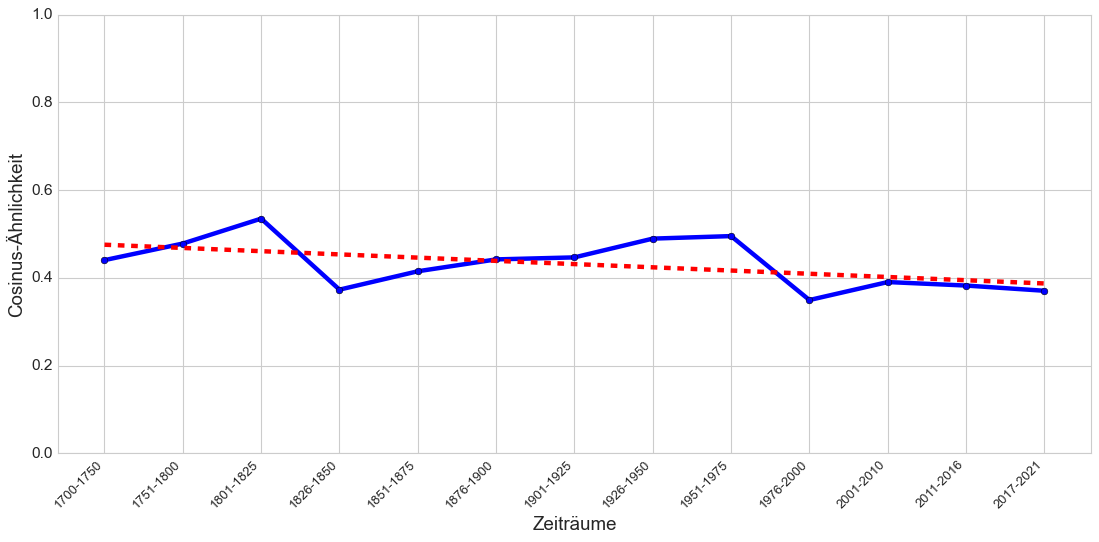

In [66]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='orribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [67]:
orribilmente1 = compare_cos(periods, models, 'orribilmente', 'angoscia')
orribilmente2 = compare_cos(periods, models, 'orribilmente', 'atterrire')
orribilmente3 = compare_cos(periods, models, 'orribilmente', 'panico')
orribilmente4 = compare_cos(periods, models, 'orribilmente', 'paura')
orribilmente5 = compare_cos(periods, models, 'orribilmente', 'raccapricciare')
orribilmente6 = compare_cos(periods, models, 'orribilmente', 'schifo')
orribilmente7 = compare_cos(periods, models, 'orribilmente', 'sgomentare')
orribilmente8 = compare_cos(periods, models, 'orribilmente', 'sgomento')
orribilmente9 = compare_cos(periods, models, 'orribilmente', 'spaventare')
orribilmente10 = compare_cos(periods, models, 'orribilmente', 'spavento')
orribilmente11 = compare_cos(periods, models, 'orribilmente', 'terrore')

In [68]:
orribilmente_df = pd.DataFrame([orribilmente1, orribilmente2, orribilmente3, orribilmente4, orribilmente5, orribilmente6, orribilmente7, orribilmente8, orribilmente9, orribilmente10, orribilmente11])

# Durchschnitt pro Zeitraum
orribilmente_mean = dict(orribilmente_df.mean())

# min pro Zeitraum
orribilmente_min = dict(orribilmente_df.min())
orribilmente_min_list = [float(x) for x in list(orribilmente_min.values())]

#max pro Zeitraum 
orribilmente_max = dict(orribilmente_df.max())
orribilmente_max_list = [float(x) for x in list(orribilmente_max.values())]

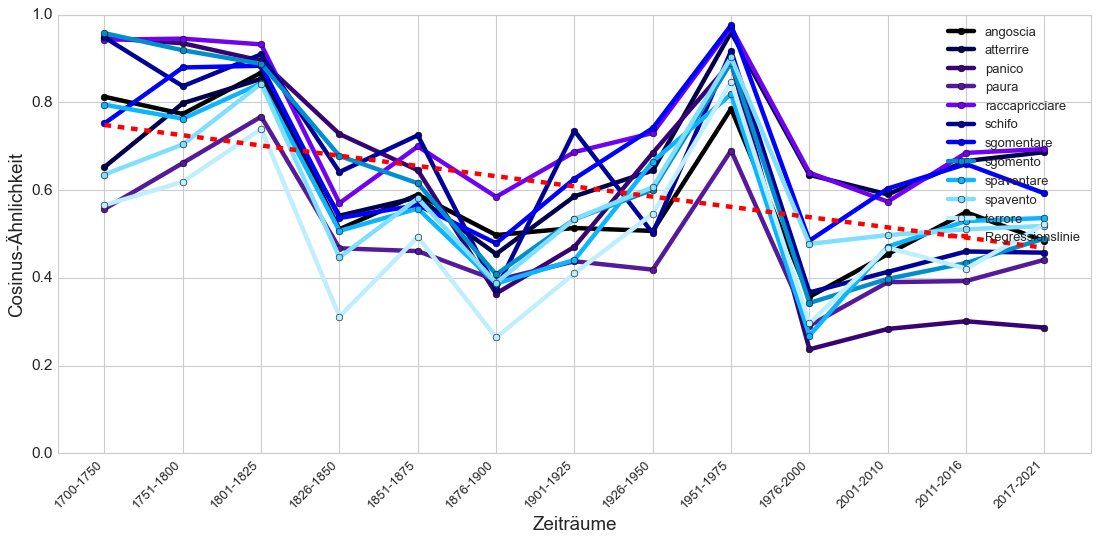

In [69]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

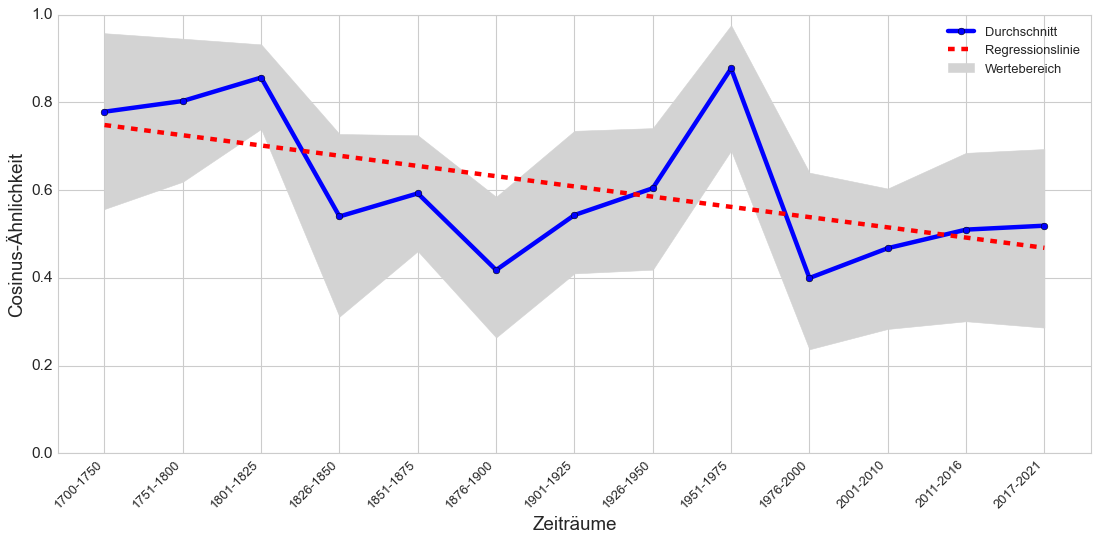

In [70]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orribilmente_max_list, orribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### spaventosamente

In [71]:
compare_words(periods, models, 'spaventosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(impreso, 0.9827852249145508)",not in vocab,"(spezzate, 0.9932125210762024)","(amorevol, 0.9919465780258179)","(fioccare, 0.9283667206764221)","(annebbiare, 0.8517158627510071)","(fiotto, 0.8756803274154663)","(roseo, 0.931382954120636)","(navigare, 0.968076229095459)","(arido, 0.8501205444335938)","(mostruosamente, 0.8205793499946594)","(mostruosamente, 0.8277562260627747)","(mostruosamente, 0.8420299291610718)"
1,"(gabbia, 0.9813323616981506)",not in vocab,"(sparse, 0.9931079149246216)","(linfa, 0.9917726516723633)","(gragnuola, 0.9278318285942078)","(vibrazione, 0.8419197797775269)","(anelante, 0.872058629989624)","(gota, 0.9262044429779053)","(poveramente, 0.9672953486442566)","(mostruosamente, 0.8461815118789673)","(orribilmente, 0.7262002825737)","(talmente, 0.7899394035339355)","(incredibilmente, 0.8247208595275879)"
2,"(cespo, 0.980144739151001)",not in vocab,"(pedata, 0.992988646030426)","(febre, 0.9917283058166504)","(imperversare, 0.9249905943870544)","(torpore, 0.8376081585884094)","(gelido, 0.8654117584228516)","(pallore, 0.9247037172317505)","(pittoricamente, 0.9670606255531311)","(ignorante, 0.8263874650001526)","(tremendamente, 0.722166895866394)","(superficiale, 0.774422287940979)","(talmente, 0.8048376441001892)"
3,"(ind, 0.9796878099441528)",not in vocab,"(luccicare, 0.9927854537963867)","(disorbitante, 0.991448700428009)","(vomitare, 0.9225347638130188)","(insensibile, 0.8333751559257507)","(ruggito, 0.8632985353469849)","(acceso, 0.9220556616783142)","(sperduto, 0.9664690494537354)","(superficie, 0.825614869594574)","(spettro, 0.720659613609314)","(incredibilmente, 0.7697162628173828)","(terribilmente, 0.7923072576522827)"
4,"(scoppio, 0.978248119354248)",not in vocab,"(ibero, 0.9927444458007812)","(mox, 0.9912322759628296)","(levossi, 0.9211400747299194)","(veemente, 0.8315955996513367)","(ruggiva, 0.8612833023071289)","(smorto, 0.9191727042198181)","(pirandelliano, 0.9655911326408386)","(infinitamente, 0.8208345174789429)","(invisibile, 0.717936635017395)","(sfumatura, 0.7669928669929504)","(tremendamente, 0.7768694162368774)"
5,"(tirren, 0.978149950504303)",not in vocab,"(disciolti, 0.9927023649215698)","(ridirne, 0.9911826848983765)","(capitombolare, 0.9198015928268433)","(sopore, 0.8265829086303711)","(leggiero, 0.8599684834480286)","(morbido, 0.9164770245552063)","(rupestre, 0.9653935432434082)","(gradevole, 0.8204410672187805)","(terribilmente, 0.7013365030288696)","(umido, 0.7658140063285828)","(assai, 0.7589390277862549)"
6,"(andianne, 0.9776221513748169)",not in vocab,"(monticello, 0.9925345182418823)","(guadare, 0.9909694194793701)","(fornace, 0.9197295904159546)","(vertiginoso, 0.8264590501785278)","(gonfio, 0.8557204604148865)","(stranamente, 0.9154289364814758)","(svariati, 0.9651304483413696)","(irreale, 0.8199609518051147)","(straordinariamente, 0.7003015875816345)","(magro, 0.757595419883728)","(estremamente, 0.7534013390541077)"
7,"(indico, 0.977393627166748)",not in vocab,"(tenbre, 0.9925117492675781)","(volubil, 0.9908949732780457)","(fiumana, 0.9185625314712524)","(stravolgere, 0.8238725066184998)","(livido, 0.8503679037094116)","(nudità, 0.9147823452949524)","(donnina, 0.964553952217102)","(sobrio, 0.8175438642501831)","(apparentemente, 0.6991618871688843)","(tinta, 0.7550017237663269)","(eccessivamente, 0.7503821849822998)"
8,"(lampeggiare, 0.9772303700447083)",not in vocab,"(armille, 0.9925072193145752)","(nudrir, 0.9907315969467163)","(corsiero, 0.9184196591377258)","(fiaccare, 0.822862446308136)","(cereo, 0.84784996509552)","(gracile, 0.9139947295188904)","(talune, 0.964177131652832)","(inesorabile, 0.8174420595169067)","(incredibilmente, 0.6980968117713928)","(osso, 0.7523475289344788)","(vena, 0.7489433288574219)"
9,"(corfù, 0.9771965742111206)",not in vocab,"(tiengli, 0.9924672842025757)","(succeduto, 0.9906718730926514)","(procella, 0.9174908995

In [72]:
compare_cos(periods, models, 'spaventosamente', 'molto')

{'1700-1750': 0.4887257516384125,
 '1801-1825': 0.4432236850261688,
 '1826-1850': 0.5067641735076904,
 '1851-1875': 0.4331013262271881,
 '1876-1900': 0.4510182738304138,
 '1901-1925': 0.3772352337837219,
 '1926-1950': 0.4763304889202118,
 '1951-1975': 0.5550349354743958,
 '1976-2000': 0.6285715103149414,
 '2001-2010': 0.5650334358215332,
 '2011-2016': 0.5657539963722229,
 '2017-2021': 0.5984463691711426}

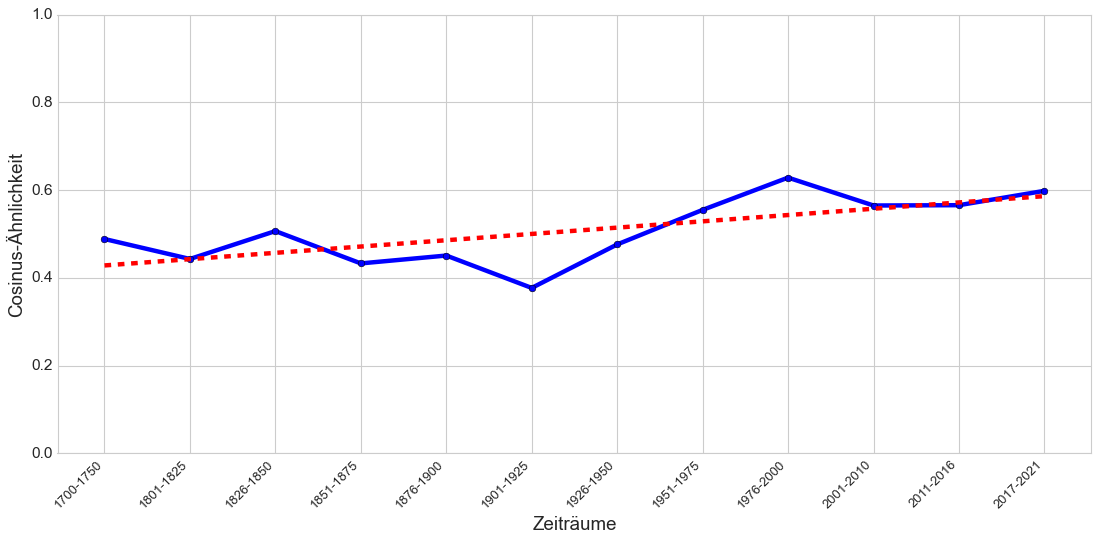

In [73]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'spaventosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='spaventosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [74]:
spaventosamente1 = compare_cos(periods, models, 'spaventosamente', 'angoscia')
spaventosamente2 = compare_cos(periods, models, 'spaventosamente', 'atterrire')
spaventosamente3 = compare_cos(periods, models, 'spaventosamente', 'panico')
spaventosamente4 = compare_cos(periods, models, 'spaventosamente', 'paura')
spaventosamente5 = compare_cos(periods, models, 'spaventosamente', 'raccapricciare')
spaventosamente6 = compare_cos(periods, models, 'spaventosamente', 'schifo')
spaventosamente7 = compare_cos(periods, models, 'spaventosamente', 'sgomentare')
spaventosamente8 = compare_cos(periods, models, 'spaventosamente', 'sgomento')
spaventosamente9 = compare_cos(periods, models, 'spaventosamente', 'spaventare')
spaventosamente10 = compare_cos(periods, models, 'spaventosamente', 'spavento')
spaventosamente11 = compare_cos(periods, models, 'spaventosamente', 'terrore')

In [75]:
spaventosamente_df = pd.DataFrame([spaventosamente1, spaventosamente2, spaventosamente3, spaventosamente4, spaventosamente5, spaventosamente6, spaventosamente7, spaventosamente8, spaventosamente9, spaventosamente10, spaventosamente11])

# Durchschnitt pro Zeitraum
spaventosamente_mean = dict(spaventosamente_df.mean())

# min pro Zeitraum
spaventosamente_min = dict(spaventosamente_df.min())
spaventosamente_min_list = [float(x) for x in list(spaventosamente_min.values())]

#max pro Zeitraum 
spaventosamente_max = dict(spaventosamente_df.max())
spaventosamente_max_list = [float(x) for x in list(spaventosamente_max.values())]

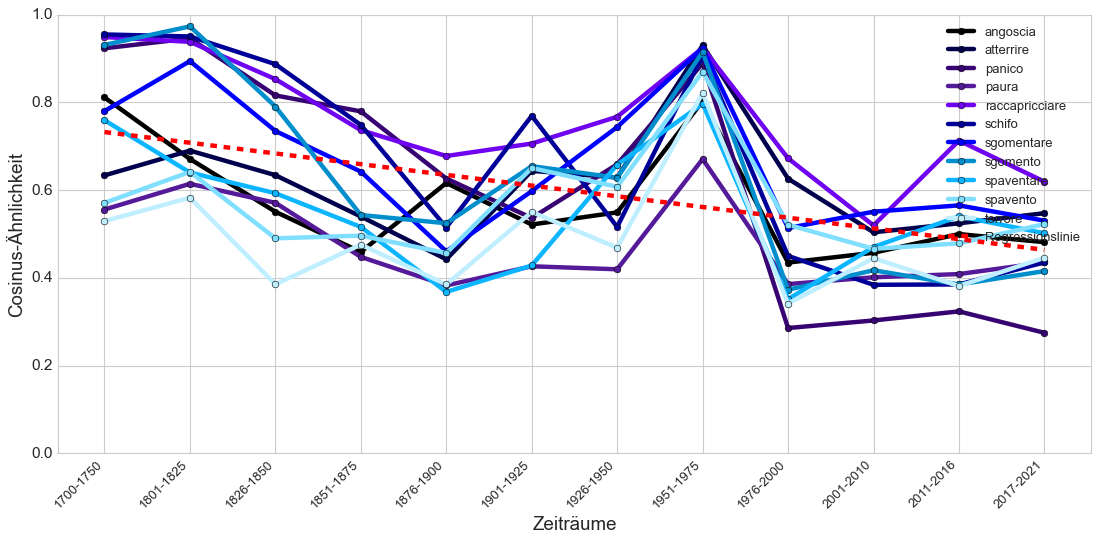

In [76]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, spaventosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, spaventosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, spaventosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, spaventosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, spaventosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, spaventosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, spaventosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, spaventosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, spaventosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, spaventosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

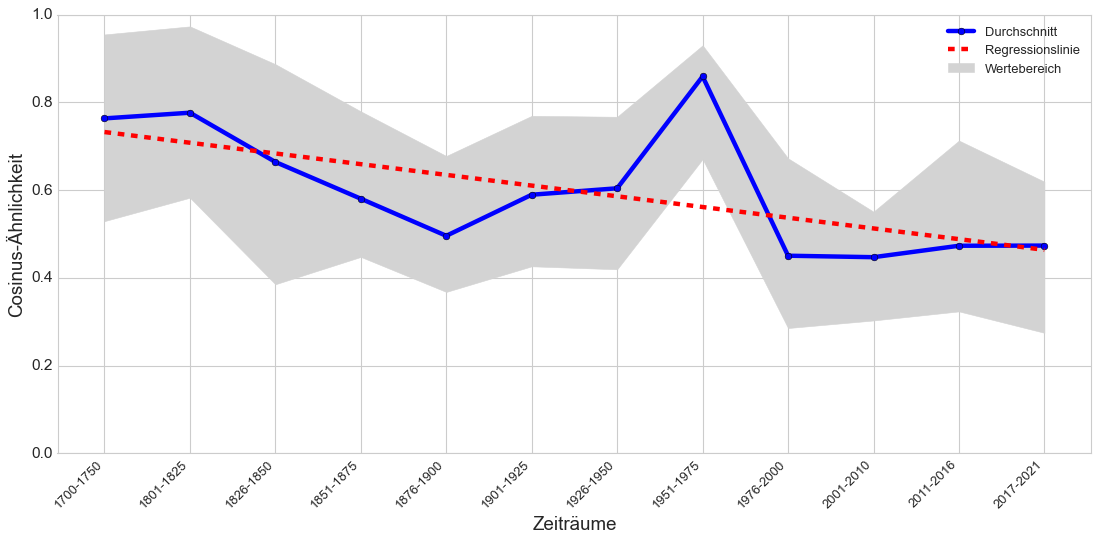

In [77]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, spaventosamente_max_list, spaventosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### terribilmente

In [78]:
compare_words(periods, models, 'terribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(antrodoco, 0.9866219758987427)","(arresto, 0.9778227806091309)","(scuopre, 0.9851997494697571)","(percossa, 0.9599633812904358)","(dolorosamente, 0.9015963673591614)","(impassibile, 0.7114067673683167)","(sofferente, 0.8395122289657593)","(gelosia, 0.9000765681266785)","(commuovere, 0.9688659310340881)","(tremendamente, 0.8744643330574036)","(tremendamente, 0.9022032022476196)","(tremendamente, 0.8893652558326721)","(tremendamente, 0.9034845232963562)"
1,"(frascati, 0.9866167306900024)","(sgombri, 0.9761677980422974)","(cruccio, 0.9837131500244141)","(sprone, 0.9535753726959229)","(turbato, 0.8780904412269592)","(stranamente, 0.7084872722625732)","(atroce, 0.8226228356361389)","(amaro, 0.8619842529296875)","(preoccupato, 0.9660919904708862)","(estremamente, 0.7193639874458313)","(mostruosamente, 0.724662184715271)","(spaventosamente, 0.7331547737121582)","(spaventosamente, 0.7923072576522827)"
2,"(ferraio, 0.9857727885246277)","(messaggero, 0.9755281209945679)","(velare, 0.982719898223877)","(chiodo, 0.9534943103790283)","(rassegnato, 0.8677985072135925)","(straordinariamente, 0.698564350605011)","(languore, 0.8160688877105713)","(crudele, 0.8605104684829712)","(neppur, 0.9651234149932861)","(talmente, 0.6856866478919983)","(spaventosamente, 0.7013365030288696)","(mostruosamente, 0.7259922027587891)","(mostruosamente, 0.7809638381004333)"
3,"(sbarc, 0.9855538010597229)","(accortosi, 0.9748232364654541)","(desidèri, 0.9826474189758301)","(polso, 0.9511827230453491)","(stravolgere, 0.8663475513458252)","(altero, 0.6933516263961792)","(cordoglio, 0.8113656044006348)","(sincero, 0.8575181365013123)","(talmente, 0.9639379382133484)","(particolarmente, 0.6706925630569458)","(orribilmente, 0.6759095191955566)","(talmente, 0.7159863710403442)","(talmente, 0.7664461731910706)"
4,"(croati, 0.9851475358009338)","(stipendiare, 0.9735144376754761)","(ricomporre, 0.9826146364212036)","(staffa, 0.9498856067657471)","(delirante, 0.8650036454200745)","(ghigno, 0.6927006244659424)","(insopportabile, 0.8081063032150269)","(malvagio, 0.8539475798606873)","(dev, 0.9582453370094299)","(altrettanto, 0.6546046137809753)","(profondamente, 0.6424903869628906)","(estremamente, 0.6926637291908264)","(incredibilmente, 0.7524759769439697)"
5,"(firenzuola, 0.9850524663925171)","(timocrate, 0.9733334183692932)","(fervere, 0.9817708730697632)","(occhiale, 0.9496910572052002)","(abbattuto, 0.8643327951431274)","(disfatta, 0.6924512386322021)","(gelosia, 0.8007906079292297)","(dolente, 0.852183997631073)","(verit, 0.9572679996490479)","(assai, 0.6472545266151428)","(estremamente, 0.6329141855239868)","(incredibilmente, 0.6732056736946106)","(assai, 0.7389584183692932)"
6,"(ubertino, 0.9850491285324097)","(arriani, 0.973212718963623)","(intrepidezza, 0.9814004898071289)","(assalitore, 0.9487507343292236)","(languido, 0.8626545667648315)","(oppresso, 0.689448893070221)","(stranamente, 0.8002028465270996)","(peccato, 0.8515132665634155)","(vergognare, 0.9570806622505188)","(spaventosamente, 0.6414105296134949)","(atrocemente, 0.6284782290458679)","(alquanto, 0.6684221029281616)","(affatto, 0.7386596202850342)"
7,"(garda, 0.9848909974098206)","(gabriello, 0.9731234312057495)","(incorruttibile, 0.9812076687812805)","(dimenare, 0.9482871294021606)","(pensoso, 0.8594728708267212)","(impenetrabile, 0.6879388689994812)","(torturare, 0.8000179529190063)","(stupido, 0.8482652306556702)","(indovinare, 0.9570572972297668)","(politicamente, 0.6383099555969238)","(particolarmente, 0.617077648639679)","(orribilmente, 0.6598615050315857)","(estremamente, 0.7331236004829407)"
8,"(garamanti, 0.9847463369369507)","(diriggere, 0.9726517796516418)","(inintelligibile, 0.9803751111030579)","(recidere, 0.9471475481987)","(sfinire, 0.8594635128974915)","(rude, 0.687107264995575)","(strazio, 0.7986184358596802)","(disprezzo, 0.8449000120162964)","(ramment

In [79]:
compare_cos(periods, models, 'terribilmente', 'molto')

{'1700-1750': 0.4712839424610138,
 '1751-1800': 0.5701508522033691,
 '1801-1825': 0.6131019592285156,
 '1826-1850': 0.502669632434845,
 '1851-1875': 0.5183914303779602,
 '1876-1900': 0.45371013879776,
 '1901-1925': 0.5743913054466248,
 '1926-1950': 0.5639604926109314,
 '1951-1975': 0.6230015754699707,
 '1976-2000': 0.555633544921875,
 '2001-2010': 0.47656625509262085,
 '2011-2016': 0.518480658531189,
 '2017-2021': 0.5764428973197937}

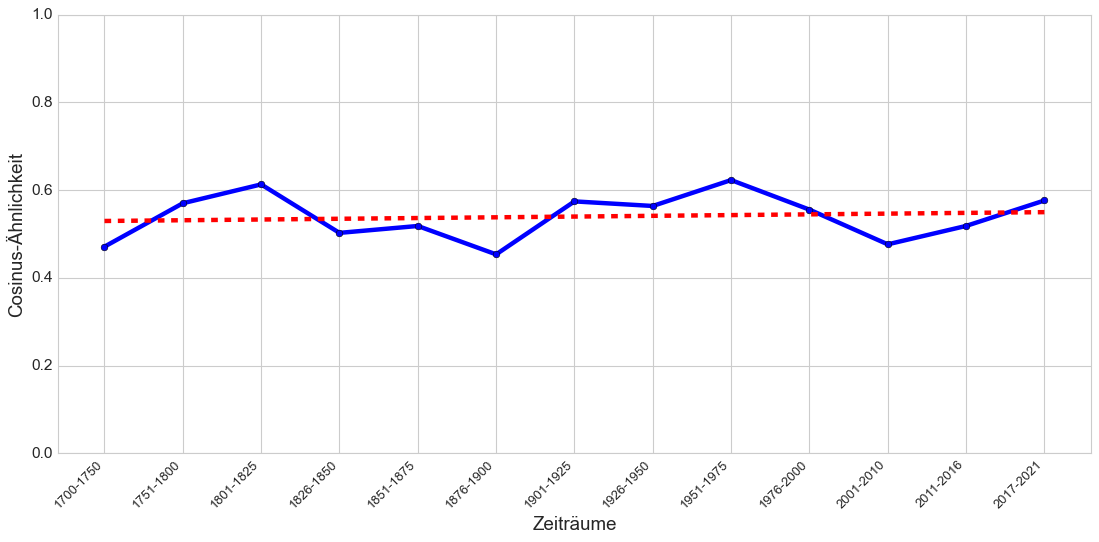

In [80]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [81]:
terribilmente1 = compare_cos(periods, models, 'terribilmente', 'angoscia')
terribilmente2 = compare_cos(periods, models, 'terribilmente', 'atterrire')
terribilmente3 = compare_cos(periods, models, 'terribilmente', 'panico')
terribilmente4 = compare_cos(periods, models, 'terribilmente', 'paura')
terribilmente5 = compare_cos(periods, models, 'terribilmente', 'raccapricciare')
terribilmente6 = compare_cos(periods, models, 'terribilmente', 'schifo')
terribilmente7 = compare_cos(periods, models, 'terribilmente', 'sgomentare')
terribilmente8 = compare_cos(periods, models, 'terribilmente', 'sgomento')
terribilmente9 = compare_cos(periods, models, 'terribilmente', 'spaventare')
terribilmente10 = compare_cos(periods, models, 'terribilmente', 'spavento')
terribilmente11 = compare_cos(periods, models, 'terribilmente', 'terrore')

In [82]:
terribilmente_df = pd.DataFrame([terribilmente1, terribilmente2, terribilmente3, terribilmente4, terribilmente5, terribilmente6, terribilmente7, terribilmente8, terribilmente9, terribilmente10, terribilmente11])

# Durchschnitt pro Zeitraum
terribilmente_mean = dict(terribilmente_df.mean())

# min pro Zeitraum
terribilmente_min = dict(terribilmente_df.min())
terribilmente_min_list = [float(x) for x in list(terribilmente_min.values())]

#max pro Zeitraum 
terribilmente_max = dict(terribilmente_df.max())
terribilmente_max_list = [float(x) for x in list(terribilmente_max.values())]

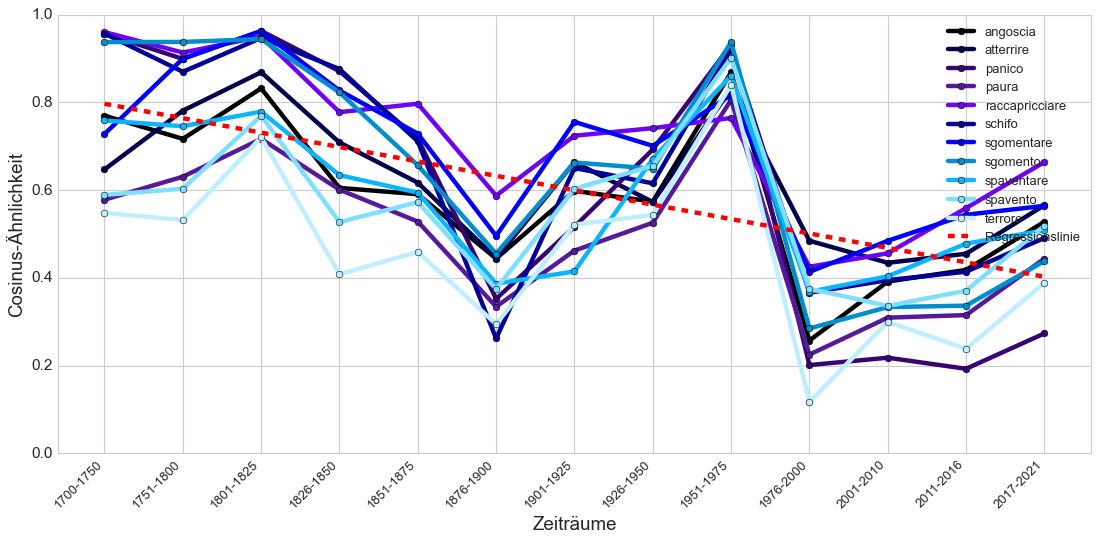

In [83]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, terribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, terribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, terribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, terribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, terribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, terribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, terribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, terribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, terribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, terribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

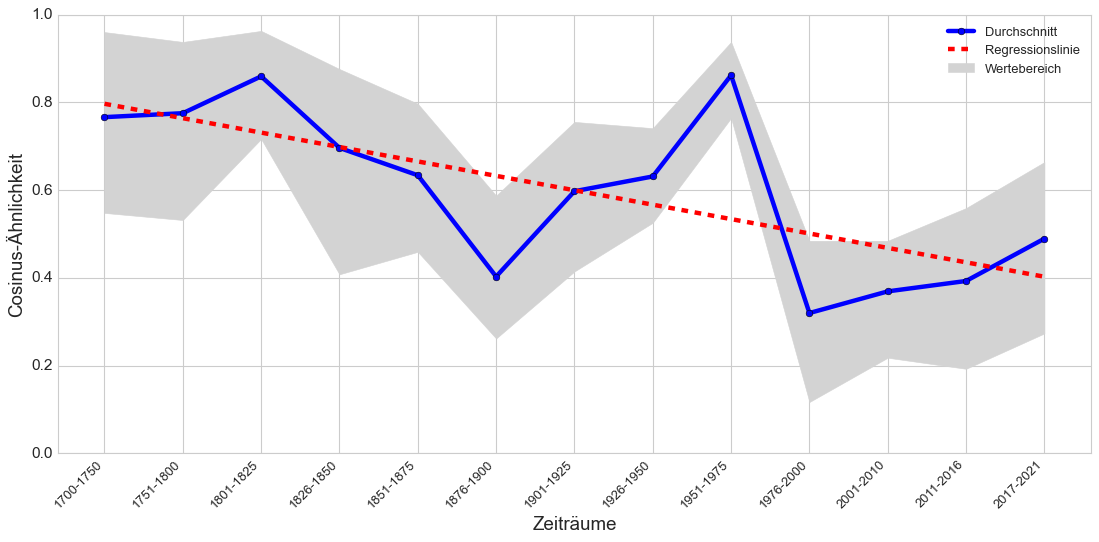

In [84]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, terribilmente_max_list, terribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### tremendamente

In [85]:
compare_words(periods, models, 'tremendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,not in vocab,not in vocab,"(scapigliato, 0.9933478236198425)","(saffo, 0.9876757264137268)","(schianto, 0.9030153751373291)","(mitigare, 0.8642922043800354)","(sragionare, 0.9564158916473389)","(contrastarvi, 0.9720960855484009)","(riaccostare, 0.9918277859687805)","(terribilmente, 0.8744643926620483)","(terribilmente, 0.9022031426429749)","(terribilmente, 0.8893653154373169)","(terribilmente, 0.9034844636917114)"
1,not in vocab,not in vocab,"(sapesti, 0.9931020140647888)","(congiunte, 0.9873471260070801)","(delirante, 0.9024021029472351)","(comprimere, 0.8600980639457703)","(scellerato, 0.9541997909545898)","(attanagliare, 0.9719438552856445)","(incartare, 0.9917529225349426)","(estremamente, 0.7822626829147339)","(mostruosamente, 0.7972805500030518)","(mostruosamente, 0.7625049948692322)","(mostruosamente, 0.7979291081428528)"
2,not in vocab,not in vocab,"(pneumatico, 0.992878794670105)","(seggon, 0.9870179891586304)","(rantolo, 0.8964231014251709)","(straziare, 0.8574299812316895)","(crudelt, 0.9540684223175049)","(angosce, 0.9711454510688782)","(scherer, 0.991613507270813)","(tecnicamente, 0.7664176821708679)","(spaventosamente, 0.7221668362617493)","(estremamente, 0.7342091202735901)","(talmente, 0.7902937531471252)"
3,not in vocab,not in vocab,"(salamandre, 0.9927260279655457)","(divinit, 0.9867680668830872)","(dolorosamente, 0.8963989615440369)","(irritazione, 0.8570979833602905)","(farmi, 0.9539020657539368)","(cotest, 0.9694179892539978)","(disney, 0.9914669394493103)","(talmente, 0.7582510709762573)","(orribilmente, 0.7079430222511292)","(spaventosamente, 0.7159939408302307)","(spaventosamente, 0.7768694758415222)"
4,not in vocab,not in vocab,"(copernico, 0.992608368396759)","(opprimersi, 0.9864622354507446)","(sanguinare, 0.8953270316123962)","(disdegno, 0.8544096350669861)","(ajutarmi, 0.9537439942359924)","(inspiegabile, 0.9690379500389099)","(ipertrofico, 0.991439163684845)","(spaventosamente, 0.7502779364585876)","(estremamente, 0.7008177042007446)","(incredibilmente, 0.6956676244735718)","(estremamente, 0.7673419713973999)"
5,not in vocab,not in vocab,"(capri, 0.992545485496521)","(empiet, 0.9864277243614197)","(singulto, 0.8942956924438477)","(lenire, 0.8506452441215515)","(semplicit, 0.9531720876693726)","(tramortire, 0.9673271775245667)","(renitente, 0.9914135336875916)","(altrettanto, 0.7458910942077637)","(profondamente, 0.6976951360702515)","(talmente, 0.6885455846786499)","(incredibilmente, 0.7575475573539734)"
6,not in vocab,not in vocab,"(erinni, 0.9925172924995422)","(nocciolo, 0.986201286315918)","(stravolgere, 0.8941842913627625)","(impressionabile, 0.8497878909111023)","(ipocrita, 0.9520432353019714)","(disinganno, 0.9669244885444641)","(populista, 0.9912276864051819)","(politicamente, 0.741051971912384)","(alquanto, 0.6773436069488525)","(abbastanza, 0.686333954334259)","(assai, 0.7487443685531616)"
7,not in vocab,not in vocab,"(ciglioni, 0.9923751354217529)","(vergini, 0.9858283996582031)","(fatidico, 0.8910612463951111)","(scoramento, 0.8451219201087952)","(interruppi, 0.9512494206428528)","(dicendomi, 0.9662232398986816)","(esclusivismo, 0.9910962581634521)","(mostruosamente, 0.7397774457931519)","(talmente, 0.6748960018157959)","(alquanto, 0.6830447316169739)","(abbastanza, 0.7322685122489929)"
8,not in vocab,not in vocab,"(rivaud, 0.992300271987915)","(legatura, 0.9857746958732605)","(balsamo, 0.8904639482498169)","(commoveva, 0.8443748950958252)","(estremamente, 0.949361264705658)","(affanno, 0.9659470319747925)","(stilizzare, 0.9910581111907959)","(particolarmente, 0.732204258441925)","(veramente, 0.6739646196365356)","(particolarmente, 0.6713566780090332)","(decisamente, 0.7253945469856262)"
9,not in vocab,not in vocab,"(minare, 0.9922423958778381)","(rigenerandosi, 0.9853547215461731)","(sarcasmo, 0.8873022198677063)","(invocazione, 0.8437716364860535)","(de

In [86]:
compare_cos(periods, models, 'tremendamente', 'molto')

{'1801-1825': 0.4882773756980896,
 '1826-1850': 0.5204395055770874,
 '1851-1875': 0.4711177349090576,
 '1876-1900': 0.48693105578422546,
 '1901-1925': 0.5336098074913025,
 '1926-1950': 0.5323057770729065,
 '1951-1975': 0.5372568368911743,
 '1976-2000': 0.6454623937606812,
 '2001-2010': 0.5362990498542786,
 '2011-2016': 0.5777130722999573,
 '2017-2021': 0.5822657346725464}

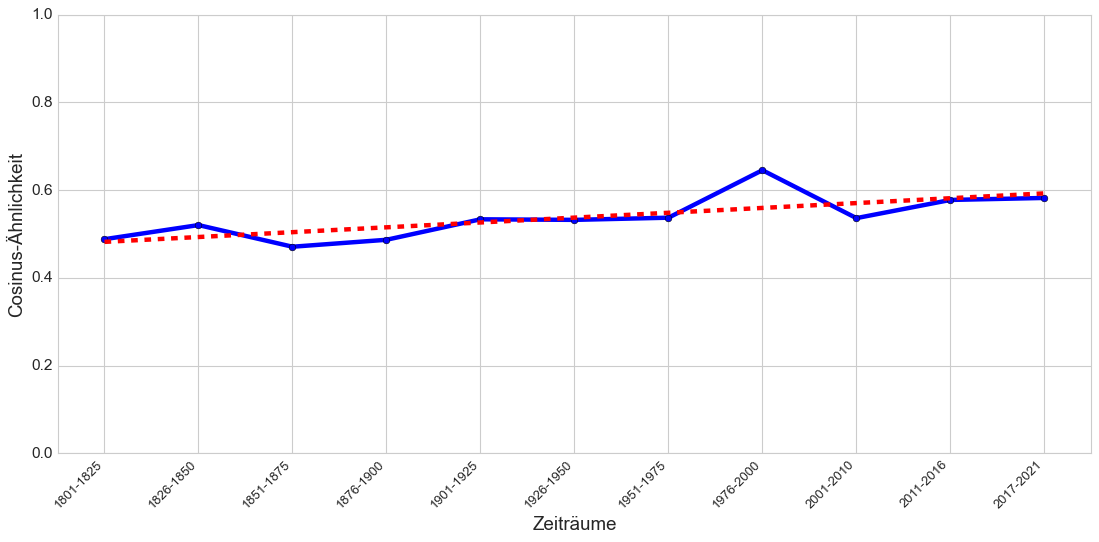

In [87]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'tremendamente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='tremendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [88]:
tremendamente1 = compare_cos(periods, models, 'tremendamente', 'angoscia')
tremendamente2 = compare_cos(periods, models, 'tremendamente', 'atterrire')
tremendamente3 = compare_cos(periods, models, 'tremendamente', 'panico')
tremendamente4 = compare_cos(periods, models, 'tremendamente', 'paura')
tremendamente5 = compare_cos(periods, models, 'tremendamente', 'raccapricciare')
tremendamente6 = compare_cos(periods, models, 'tremendamente', 'schifo')
tremendamente7 = compare_cos(periods, models, 'tremendamente', 'sgomentare')
tremendamente8 = compare_cos(periods, models, 'tremendamente', 'sgomento')
tremendamente9 = compare_cos(periods, models, 'tremendamente', 'spaventare')
tremendamente10 = compare_cos(periods, models, 'tremendamente', 'spavento')
tremendamente11 = compare_cos(periods, models, 'tremendamente', 'terrore')

In [89]:
tremendamente_df = pd.DataFrame([tremendamente1, tremendamente2, tremendamente3, tremendamente4, tremendamente5, tremendamente6, tremendamente7, tremendamente8, tremendamente9, tremendamente10, tremendamente11])

# Durchschnitt pro Zeitraum
tremendamente_mean = dict(tremendamente_df.mean())

# min pro Zeitraum
tremendamente_min = dict(tremendamente_df.min())
tremendamente_min_list = [float(x) for x in list(tremendamente_min.values())]

#max pro Zeitraum 
tremendamente_max = dict(tremendamente_df.max())
tremendamente_max_list = [float(x) for x in list(tremendamente_max.values())]

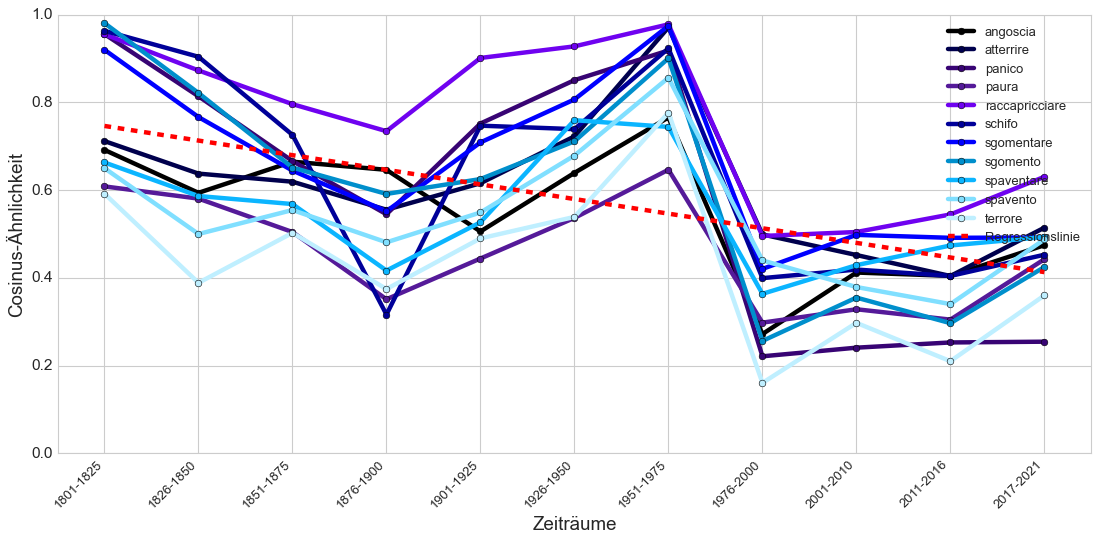

In [90]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, tremendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, tremendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, tremendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, tremendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, tremendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, tremendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, tremendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, tremendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, tremendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, tremendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

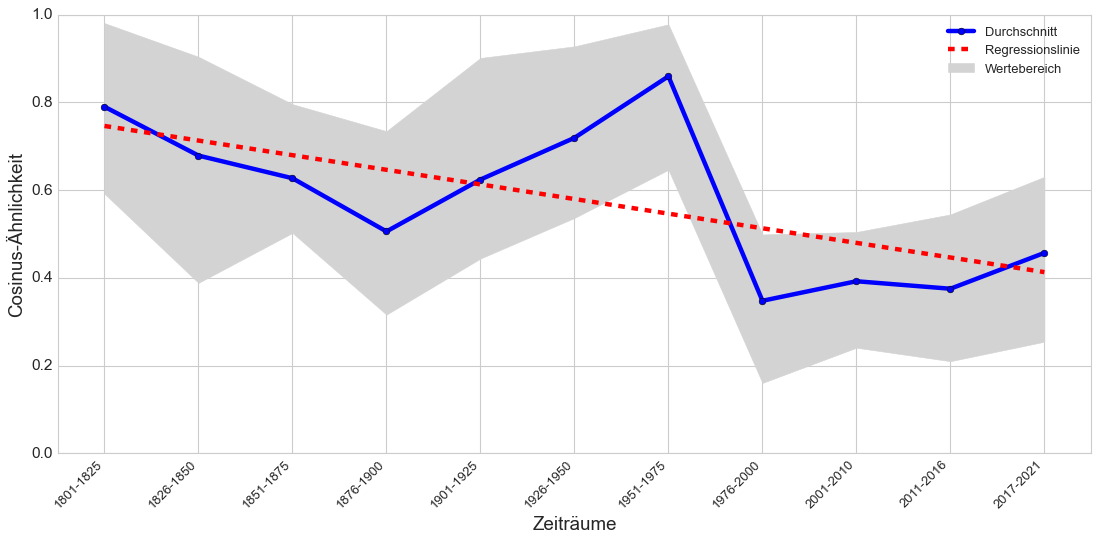

In [91]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, tremendamente_max_list, tremendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()